In [1]:
run eda1.py

eda1.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  bg_df['bg_appopen'] = 1
eda1.py:355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  more_thn_five['engagemnt']=more_thn_five['appopen']/ more_thn_five['use_age']
eda1.py:356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  more_thn_five['1w_engagement']= more_thn_

In [2]:
bg_values.head()

Date     bg  user_id  critical  acute  bg_appopen  \
0 2016-06-16 14:00:00  111.0    16170         0      0           1   
1 2016-06-15 05:00:00  127.0    16170         0      0           1   
2 2016-07-12 05:00:00  114.0    16170         0      0           1   
3 2016-06-03 06:00:00  111.0    16170         0      0           1   
4 2016-06-23 05:00:00  120.0    16170         0      0           1   

   max_open/day  days_f0bg      bins  
0             4         46  (42, 56]  
1             4         45  (42, 56]  
2             4         72  (70, 84]  
3             4         33  (28, 42]  
4             4         53  (42, 56]

In [22]:
import graphlab as gl

In [4]:
more_thn_five.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12789 entries, 1 to 43193
Data columns (total 56 columns):
user_id                         12789 non-null int64
appopen                         12789 non-null float64
max_open/day                    12789 non-null float64
use_age                         12789 non-null float64
Churn                           12789 non-null float64
1d_open                         12788 non-null float64
2dacute                         10732 non-null float64
2d_crit                         10732 non-null float64
2d_bg_entry                     10732 non-null float64
min_bg_2d                       10732 non-null float64
max_bg_2d                       10732 non-null float64
1d_carbent                      3477 non-null float64
1d_wtent                        2757 non-null float64
1w_open                         12788 non-null float64
1w_crit                         11104 non-null float64
1wacute                         11104 non-null float64
1w_bg_entry    

In [6]:
import datetime as dt

In [24]:
gl.churn_predictor

<module 'graphlab.toolkits.churn_predictor' from '/Users/Salma/anaconda2/lib/python2.7/site-packages/graphlab/toolkits/churn_predictor/__init__.pyc'>

In [27]:
bg_values.head()

Date     bg  user_id  critical  acute  bg_appopen  \
0 2016-06-16 14:00:00  111.0    16170         0      0           1   
1 2016-06-15 05:00:00  127.0    16170         0      0           1   
2 2016-07-12 05:00:00  114.0    16170         0      0           1   
3 2016-06-03 06:00:00  111.0    16170         0      0           1   
4 2016-06-23 05:00:00  120.0    16170         0      0           1   

   max_open/day  days_f0bg      bins  
0             4         46  (42, 56]  
1             4         45  (42, 56]  
2             4         72  (70, 84]  
3             4         33  (28, 42]  
4             4         53  (42, 56]

In [28]:
bg_values.bg = bg_values.bg.astype(int)

In [31]:
bg_values = bg_values.drop('bins', axis =1)

In [32]:
sf = gl.SFrame(data=bg_values)

In [33]:
sf

Columns:
	Date	datetime
	bg	int
	user_id	int
	critical	int
	acute	int
	bg_appopen	int
	max_open/day	int
	days_f0bg	int

Rows: 433176

Data:
+---------------------------+-----+---------+----------+-------+------------+--------------+
|            Date           |  bg | user_id | critical | acute | bg_appopen | max_open/day |
+---------------------------+-----+---------+----------+-------+------------+--------------+
| 2016-06-16 14:00:00+00:00 | 111 |  16170  |    0     |   0   |     1      |      4       |
| 2016-06-15 05:00:00+00:00 | 127 |  16170  |    0     |   0   |     1      |      4       |
| 2016-07-12 05:00:00+00:00 | 114 |  16170  |    0     |   0   |     1      |      4       |
| 2016-06-03 06:00:00+00:00 | 111 |  16170  |    0     |   0   |     1      |      4       |
| 2016-06-23 05:00:00+00:00 | 120 |  16170  |    0     |   0   |     1      |      4       |
| 2016-05-12 06:00:00+00:00 | 102 |  16170  |    0     |   0   |     1      |      4       |
| 2016-05-14 06:00:00+00:00 | 104 |  16170  |    0     |   0   |     1      |      4       |
| 2016-07-16 09:00:00+00:00 | 101 |  16170  |    0     |   0   |     1      |      4       |
| 2016-05-11 03:00:00+00:00 |  99 |  16170  |    0     |   0   |     1      |      4       |
| 2016-07-13 06:00:00+00:00 | 115 |  16170  |    0     |   0   |     1      |      4       |
+---------------------------+-----+---------+----------+-------+------------+--------------+
+-----------+
| days_f0bg |
+-----------+
|     46    |
|     45    |
|     72    |
|     33    |
|     53    |
|     11    |
|     13    |
|     76    |
|     10    |
|     73    |
+-----------+
[433176 rows x 8 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [17]:
dist_users= bg_values.user_id.unique().tolist()

In [40]:
from dateutil import parser

In [42]:
sf =sf.dropna()

In [45]:
time_series = gl.TimeSeries(sf, 'Date')


In [46]:
time_series

Columns:
	Date	datetime (index column)
	bg	int
	user_id	int
	critical	int
	acute	int
	bg_appopen	int
	max_open/day	int
	days_f0bg	int

Rows: 433176

Data:
+---------------------------+-----+---------+----------+-------+------------+--------------+
|            Date           |  bg | user_id | critical | acute | bg_appopen | max_open/day |
+---------------------------+-----+---------+----------+-------+------------+--------------+
| 2016-05-01 00:00:00+00:00 | 151 |  33550  |    0     |   0   |     1      |      41      |
| 2016-05-01 00:00:00+00:00 | 153 |  41053  |    0     |   0   |     1      |      7       |
| 2016-05-01 00:00:00+00:00 | 129 |  14742  |    0     |   0   |     1      |      13      |
| 2016-05-01 00:00:00+00:00 | 145 |  26306  |    0     |   0   |     1      |      14      |
| 2016-05-01 00:00:00+00:00 | 130 |  12276  |    0     |   0   |     1      |      8       |
| 2016-05-01 00:00:00+00:00 |  73 |   3095  |    0     |   0   |     1      |      7       |
| 2016-05-01 00:00:00+00:00 | 187 |  14508  |    0     |   0   |     1      |      11      |
| 2016-05-01 00:00:00+00:00 | 109 |   2340  |    0     |   0   |     1      |      19      |
| 2016-05-01 00:00:00+00:00 | 180 |  40231  |    0     |   0   |     1      |      17      |
| 2016-05-01 00:00:00+00:00 | 234 |   2623  |    0     |   0   |     1      |      17      |
+---------------------------+-----+---------+----------+-------+------------+--------------+
+-----------+
| days_f0bg |
+-----------+
|     0     |
|     0     |
|     0     |
|     0     |
|     0     |
|     0     |
|     0     |
|     0     |
|     0     |
|     0     |
+-----------+
[433176 rows x 8 columns]
Note: Only the head of the TimeSeries is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [56]:
model = gl.anomaly_detection.moving_zscore.create(sf, feature='bg',
                                                  window_size=2)

In [57]:
scores = model['scores']
scores.print_rows(200, max_row_width=100, max_column_width=20)

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 111 |      None      | 2016-11-20 19:55... |
|   1    |       None      | 127 |      None      | 2016-11-20 19:55... |
|   2    |      0.625      | 114 |     119.0      | 2016-11-20 19:55... |
|   3    |  1.46153846154  | 111 |     120.5      | 2016-11-20 19:55... |
|   4    |       5.0       | 120 |     112.5      | 2016-11-20 19:55... |
|   5    |       3.0       | 102 |     115.5      | 2016-11-20 19:55... |
|   6    |  0.777777777778 | 104 |     111.0      | 2016-11-20 19:55... |
|   7    |       2.0       | 101 |     103.0      | 2016-11-20 19:55... |
|   8    |  2.33333333333  |  99 |     102.5      | 2016-11-20 19:55... |
|   9    |       15.0      | 115 |     100.0      | 2016-11-20 19:55... |
|   10   |      1.125      | 116 |    

In [52]:
sketch = scores['anomaly_score'].sketch_summary()
threshold = sketch.quantile(0.1)
anomalies = scores[scores['anomaly_score'] > threshold]
anomalies.print_rows(3, max_row_width=100, max_column_width=20)

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]



In [63]:
bg_anomaly_users = more_thn_five[more_thn_five.max_bg_open>=10]

In [67]:
users_anom = bg_anomaly_users.user_id.unique().tolist()

In [107]:
users_list=[]

for users in users_anom:
    df = bg_values[bg_values['user_id']==users]
    sf= gl.SFrame(df)
    time_series = gl.TimeSeries(sf, 'Date')

    model = gl.anomaly_detection.moving_zscore.create(sf, feature='bg',
                                                  window_size=5)
    scores = model['scores']
    scores.print_rows(10, max_row_width=100, max_column_width=20)
    sketch = scores['anomaly_score'].sketch_summary()
    threshold = sketch.quantile(0.9)
    anomalies = scores[scores['anomaly_score'] > threshold]
    anomalies.print_rows(3, max_row_width=100, max_column_width=20)
    if anomalies>3:
        users_list.append(users)
        




+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  69 |      None      | 2016-11-21 12:41... |
|   1    |      None      | 104 |      None      | 2016-11-21 12:41... |
|   2    |      None      |  93 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 118 |      None      | 2016-11-21 12:41... |
|   4    |      None      |  85 |      None      | 2016-11-21 12:41... |
|   5    | 1.31087659772  |  72 |      93.8      | 2016-11-21 12:41... |
|   6    | 0.418897775643 | 101 |      94.4      | 2016-11-21 12:41... |
|   7    | 0.181436065928 |  91 |      93.8      | 2016-11-21 12:41... |
|   8    | 0.930602339886 |  79 |      93.4      | 2016-11-21 12:41... |
|   9    | 0.844061264611 |  94 |      85.6      | 2016-11-21 12:41... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   8    | 4.80444182922 | 102 |     123.4      | 2016-11-21 12:41... |
|   13   | 6.15985625757 | 151 |     107.2      | 2016-11-21 12:41... |
|   31   | 4.05259365061 | 171 |     124.2      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[14 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 180 |      None      | 2016-11-21 12:41... |
|   1    |      None      | 142 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 131 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 174 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 100 |      None      | 2016-11-21 12:41... |
|   1    |      None     |  63 |      None      | 2016-11-21 12:41... |
|   2    |      None     |  87 |      None      | 2016-11-21 12:41... |
|   3    |      None     |  45 |      None      | 2016-11-21 12:41... |
|   4    |      None     |  64 |      None      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   11   | 3.27839984745 | 184 |     116.8      | 2016-11-21 12:41... |
|   20   | 5.66086830783 | 268 |     130.2      | 2016-11-21 12:41... |
|   24   | 3.35813833953 | 362 |     165.4      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 53 |      None      | 2016-11-21 12:41... |
|   1    |      None     | 81 |      None      | 2016-11-21 12:41... |
|   2    |      None     | 80 |      None      | 2016-11-21 12:41... |
+--------+---------------+----+----------------+

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 170 |      None      | 2016-11-21 12:41... |
|   1    |      None      |  99 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 133 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 123 |      None      | 2016-11-21 12:41... |
|   4    |      None      | 145 |      None      | 2016-11-21 12:41... |
|   5    | 0.382788156548 | 143 |     134.0      | 2016-11-21 12:41... |
|   6    | 3.48608571533  | 187 |     128.6      | 2016-11-21 12:41... |
|   7    | 0.192151773569 | 142 |     146.2      | 2016-11-21 12:41... |
|   8    | 1.23501852542  | 122 |     148.0      | 2016-11-21 12:41... |
|   9    | 0.601157638595 | 135 |     147.8      | 2016-11-21 12:41... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 131 |      None      | 2016-11-21 12:41... |
|   1    |      None      | 107 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 196 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 141 |      None      | 2016-11-21 12:41... |
|   4    |      None      | 162 |      None      | 2016-11-21 12:41... |
|   5    | 0.545624911342 | 131 |     147.4      | 2016-11-21 12:41... |
|   6    | 1.74333813136  |  95 |     147.4      | 2016-11-21 12:41... |
|   7    | 1.25476599445  | 103 |     145.0      | 2016-11-21 12:41... |
|   8    | 0.227289499549 | 132 |     126.4      | 2016-11-21 12:41... |
|   9    | 1.32656064572  |  93 |     124.6      | 2016-11-21 12:41... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   13   | 8.87439823932 | 223 |     137.4      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 285 |      None      | 2016-11-21 12:41... |
|   1    |      None     | 212 |      None      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   10   | 6.18065199365 | 61 |     124.2      | 2016-11-21 12:41... |
+--------+---------------+----+----------------+---------------------+
[1 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 241 |      None      | 2016-11-21 12:41... |
|   1    |      None      |  81 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 114 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 104 |      None      | 2016-11-21 12:41... |
|   4    |      None      | 141 |      None      | 2016-11-21 12:41... |
|   5    | 0.20062279498  | 125 |     1

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 32 |      None      | 2016-11-21 12:41... |
+--------+---------------+----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 100 |      None      | 2016-11-21 12:41... |
|   1    |      None      |  82 |

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 119 |      None      | 2016-11-21 12:41... |
|   1    |      None      | 107 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 157 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 110 |      None      | 2016-11-21 12:41... |
|   4    |      None      | 262 |      None      | 2016-11-21 12:41... |
|   5    | 0.634582094484 | 114 |     151.0      | 2016-11-21 12:41... |
|   6    | 1.01891217871  |  90 |     150.0  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   11   |  4.2890680708 | 231 |     134.2      | 2016-11-21 12:41... |
|   24   | 3.32897450477 |  98 |     176.4      | 2016-11-21 12:41... |
|   36   |  2.9927348103 | 219 |     147.0      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 134 |      None      | 2016-11-21 12:41... |
|   1    |      None     | 117 |      None      | 2016-11-21 12:41... |
|   2    |      None     | 113 |      None      | 2016-11-21 12:41... |
+--------+---------------+-----+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   16   | 2.78994332985 | 133 |     118.6      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 164 |      None      | 2016-11-21 12:41... |
|   1    |      None      |  67 |      None      | 2016-11-21 12:41... |
|   2    |      None      |  63 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 346 |      None      | 2016-11-21 12:41... |
|   4    |      None      |  94 |      None      | 2016-11-21 12:41... |
|   5    | 0.369894289619 | 186 | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   8    | 2.76609361471 | 156 |     125.0      | 2016-11-21 12:41... |
|   10   |  7.4339499336 | 275 |     135.4      | 2016-11-21 12:41... |
|   19   | 3.12607047079 | 261 |     157.0      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[32 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 238 |      None      | 2016-11-21 12:41... |
|   1    |       None      | 183 |      None      | 2016-11-21 12:41... |
|   2    |       None      | 195 |      None      | 2016-11-21 12:41... |
|   3    |       None      | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 106 |      None      | 2016-11-21 12:41... |
|   1    |      None      | 113 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 102 |      None      | 2016-11-21 12:41... |
|   3    |      None      |  96 |      None      | 2016-11-21 12:41... |
|   4    |      None      | 124 |      None      | 2016-11-21 12:41... |
|   5    | 0.331895925458 | 105 |     108.2      | 2016-11-21 12:41... |
|   6    | 1.44398974476  |  94 |     108.0      | 2016-11-21 12:41... |
|   7    | 0.637549810525 | 111 |     104.2      | 2016-11-21 12:41... |
|   8    |  1.0092167847  |  95 |     106.0      | 2016-11-21 12:41... |
+--------+----------------+-----+----------------+---------------------+
[9 rows x 5 columns]

+--------+---------------+---

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 132 |      None      | 2016-11-21 12:41... |
|   1    |      None      | 164 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 141 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 166 |      None      | 2016-11-21 12:41... |
|   4    |      None      | 140 |      None      | 2016-11-21 12:41... |
|   5    | 1.19153829712  | 165 |     148.6      | 2016-11-21 12:41... |
|   6    | 2.84447444432  | 121 |     155.2      | 2016-11-21 12:41... |
|   7    | 2.55276452068  | 190 |     146.6      | 2016-11-21 12:41... |
|   8    | 1.02793579317  | 132 |     156.4      | 2016-11-21 12:41... |
|   9    | 0.345987525213 | 141 |     149.6      | 2016-11-21 12:41... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   6    | 2.65395521079 | 129 |     114.6      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  99 |      None      | 2016-11-21 12:41... |
|   1    |      None      |  93 |      None      | 2016-11-21 12:41... |
|   2    |      None      |  89 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 225 |      None      | 2016-11-21 12:41... |
|   4    |      None      |  76 |      None      | 2016-11-21 12:41... |
|   5    | 0.394003173657 | 138 | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 84 |      None      | 2016-11-21 12:41... |
+--------+---------------+----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 131 |      None      | 2016-11-21 12:41... |
|   1    |      None      | 297 |

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 134 |      None      | 2016-11-21 12:41... |
|   1    |      None     | 178 |      None      | 2016-11-21 12:41... |
|   2    |      None     | 169 |      None      | 2016-11-21 12:41... |
|   3    |      None     | 306 |      None      | 2016-11-21 12:41... |
|   4    |      None     | 235 |      None      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 110 |      None      | 2016-11-21 12:41... |
|   1    |      None     | 124 |      None      | 2016-11-21 12:41... |
|   2    |      None     | 137 |      None      | 2016-11-21 12:41... |
|   3    |      None     | 115 |      None      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | mov

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 111 |      None      | 2016-11-21 12:41... |
|   1    |      None      | 126 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 100 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 105 |      None      | 2016-11-21 12:41... |
|   4    |      None      | 100 |      None      | 2016-11-21 12:41... |
|   5    | 0.144522024328 | 107 |     108.4      | 2016-11-21 12:41... |
|   6    | 2.74880720012  | 134 |     107.6      | 2016-11-21 12:41... |
|   7    | 0.456593843072 | 115 |     109.2      | 2016-11-21 12:41... |
|   8    | 2.33161096224  | 140 |     112.2      | 2016-11-21 12:41... |
|   9    | 1.28517249888  | 139 |     119.2      | 2016-11-21 12:41... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   21   | 3.49355559031 | 271 |     164.2      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 226 |      None      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+---

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    | 2.70271905628 | 106 |     146.4      | 2016-11-21 12:41... |
|   9    | 3.96080324433 | 167 |     123.8      | 2016-11-21 12:41... |
|   12   | 2.62440903227 |  73 |     128.0      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[6 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  87 |      None      | 2016-11-21 12:41... |
|   1    |       None      | 163 |      None      | 2016-11-21 12:41... |
|   2    |       None      |  79 |      None      | 2016-11-21 12:41... |
|   3    |       None      |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   8    | 3.42296313577 | 161 |     121.4      | 2016-11-21 12:41... |
|   20   | 5.26520028147 | 183 |     116.6      | 2016-11-21 12:41... |
|   32   | 2.90286560419 | 179 |     106.0      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 142 |      None      | 2016-11-21 12:41... |
|   1    |      None      | 146 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 139 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 136 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    | 2.98807152334 | 128 |      98.0      | 2016-11-21 12:41... |
|   14   | 3.33658762544 | 118 |      78.6      | 2016-11-21 12:41... |
|   21   | 3.10811475954 |  72 |      91.2      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[10 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  63 |      None      | 2016-11-21 12:41... |
|   1    |       None      | 194 |      None      | 2016-11-21 12:41... |
|   2    |       None      | 171 |      None      | 2016-11-21 12:41... |
|   3    |       None      | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   10   | 3.42750509926 |  72 |     168.2      | 2016-11-21 12:41... |
|   32   | 2.72805504447 | 192 |     122.0      | 2016-11-21 12:41... |
|   36   | 3.06876266542 |  88 |     168.0      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 114 |      None      | 2016-11-21 12:41... |
|   1    |       None      |  46 |      None      | 2016-11-21 12:41... |
|   2    |       None      | 241 |      None      | 2016-11-21 12:41... |
|   3    |       None      | 3

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 101 |      None      | 2016-11-21 12:41... |
|   1    |       None      |  67 |      None      | 2016-11-21 12:41... |
|   2    |       None      |  59 |      None      | 2016-11-21 12:41... |
|   3    |       None      | 145 |      None      | 2016-11-21 12:41... |
|   4    |       None      | 103 |      None      | 2016-11-21 12:41... |
|   5    |  1.40549896849  |  52 |      95.0      | 2016-11-21 12:41... |
|   6    |  1.81094919525  | 148 |      85.2      | 2016-11-21 12:41... |
|   7    | 0.0637638065711 | 104 |     101.4      | 2016-11-21 12:41... |
|   8    |   1.6696348817  |  52 |     110.4      | 2016-11-21 12:41... |
|   9    |  0.985302856273 |  56 |      91.8      | 2016-11-21 12:41... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  77 |      None      | 2016-11-21 12:41... |
|   1    |      None      |  88 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 105 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 156 |      None      | 2016-11-21 12:41... |
|   4    |      None      |  87 |      None      | 2016-11-21 12:41... |
|   5    | 0.411710079987 |  91 |     102.6      | 2016-11-21 12:41... |
|   6    | 0.28339388963  |  98 |     105.4      | 2016-11-21 12:41... |
|   7    | 1.05327344428  |  81 |     107.4      | 2016-11-21 12:41... |
|   8    | 0.242058854352 |  96 |     102.6      | 2016-11-21 12:41... |
|   9    | 0.552717675448 |  94 |      90.6      | 2016-11-21 12:41... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   9    | 3.95131664459 | 92 |     100.8      | 2016-11-21 12:41... |
+--------+---------------+----+----------------+---------------------+
[1 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 133 |      None      | 2016-11-21 12:41... |
|   1    |      None      | 380 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 172 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 156 |      None      | 2016-11-21 12:41... |
|   4    |      None      | 163 |      None      | 2016-11-21 12:41... |
|   5    | 1.41616744361  | 329 |     2

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  42 |      None      | 2016-11-21 12:41... |
|   1    |      None     | 102 |      None      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 1

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 112 |      None      | 2016-11-21 12:41... |
|   1    |      None      | 148 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 121 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 142 |      None      | 2016-11-21 12:41... |
|   4    |      None      | 107 |      None      | 2016-11-21 12:41... |
|   5    |  0.7379900741  | 114 |     126.0      | 2016-11-21 12:41... |
|   6    | 0.589994311083 | 117 |     126.4      | 2016-11-21 12:41... |
|   7    | 1.16731385544  | 134 |     120.2      | 2016-11-21 12:41... |
|   8    | 0.168257885274 | 125 |     122.8      | 2016-11-21 12:41... |
|   9    | 1.35366538417  | 132 |     119.4      | 2016-11-21 12:41... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 362 |      None      | 2016-11-21 12:41... |
|   1    |      None     | 232 |      None      | 2016-11-21 12:41... |
|   2    |      None     | 225 |      None      | 2016-11-21 12:41... |
|   3    |      None     | 266 |      None      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    | 3.05398884223 | 165 |     104.8      | 2016-11-21 12:41... |
|   14   | 8.17889299109 | 275 |     137.4      | 2016-11-21 12:41... |
|   21   | 4.59290050176 | 180 |     110.2      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[37 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  86 |      None      | 2016-11-21 12:41... |
|   1    |      None      |  65 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 139 |      None      | 2016-11-21 12:41... |
|   3    |      None      |  84 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 184 |      None      | 2016-11-21 12:41... |
|   1    |      None     | 167 |      None      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 1

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 144 |      None      | 2016-11-21 12:41... |
|   1    |      None     | 107 |      None      | 2016-11-21 12:41... |
|   2    |      None     |  82 |      None      | 2016-11-21 12:41... |
|   3    |      None     |  86 |      None      | 2016-11-21 12:41... |
|   4    |      None     |  78 |      None      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+-----------------+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  19 |      None      | 2016-11-21 12:41... |
|   1    |      None     | 330 |      None      | 2016-11-21 12:41... |
|   2    |      None     |  20 |      None      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   20   | 5.46654343859 |  85 |     133.6      | 2016-11-21 12:41... |
|   27   | 4.42857142857 | 117 |     129.4      | 2016-11-21 12:41... |
|   29   |  8.8690491693 | 190 |     128.4      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[10 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 152 |      None      | 2016-11-21 12:41... |
|   1    |       None      | 123 |      None      | 2016-11-21 12:41... |
|   2    |       None      | 110 |      None      | 2016-11-21 12:41... |
|   3    |       None      | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  95 |      None      | 2016-11-21 12:41... |
|   1    |      None      | 111 |      None      | 2016-11-21 12:41... |
|   2    |      None      | 126 |      None      | 2016-11-21 12:41... |
|   3    |      None      | 142 |      None      | 2016-11-21 12:41... |
|   4    |      None      | 141 |      None      | 2016-11-21 12:41... |
|   5    | 1.77668139915  |  91 |     123.0      | 2016-11-21 12:41... |
|   6    | 0.321558770738 | 116 |     122.2      | 2016-11-21 12:41... |
|   7    | 1.55336729914  |  94 |     123.2      | 2016-11-21 12:41... |
|   8    | 0.373747979173 | 125 |     116.8      | 2016-11-21 12:41... |
|   9    | 1.13381561096  |  92 |     113.4      | 2016-11-21 12:41... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   21   | 2.91287632502 | 154 |     126.0      | 2016-11-21 12:41... |
|   23   | 3.81321022665 | 182 |     132.2      | 2016-11-21 12:41... |
|   35   | 3.60385676673 | 113 |     137.4      | 2016-11-21 12:41... |
+--------+---------------+-----+----------------+---------------------+
[16 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 107 |      None      | 2016-11-21 12:41... |
|   1    |      None     |  90 |      None      | 2016-11-21 12:41... |
|   2    |      None     | 109 |      None      | 2016-11-21 12:41... |
|   3    |      None     | 122 |      Non

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 167 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+------------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   19   | 3.15390437237 | 141 |     102.6      | 2016-11-21 12:42... |
|   25   |  3.5723324012 | 148 |     120.2      | 2016-11-21 12:42... |
|   46   | 4.96788553467 |  91 |     117.4      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[13 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  86 |      None      | 2016-11-21 12:42... |
|   1    |      None     |  75 |      None      | 2016-11-21 12:42... |
|   2    |      None     | 178 |      None      | 2016-11-21 12:42... |
|   3    |      None     | 187 |      Non

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 135 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 150 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 124 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 124 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 158 |      None      | 2016-11-21 12:42... |
|   5    | 1.80412548214  | 163 |     138.2      | 2016-11-21 12:42... |
|   6    | 1.84540349853  | 113 |     143.8      | 2016-11-21 12:42... |
|   7    | 1.37003498511  | 164 |     136.4      | 2016-11-21 12:42... |
|   8    | 0.994070110246 | 123 |     144.4      | 2016-11-21 12:42... |
|   9    | 2.15469247871  | 191 |     144.2      | 2016-11-21 12:42... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 195 |      None      | 2016-11-21 12:42... |
|   1    |       None      | 205 |      None      | 2016-11-21 12:42... |
|   2    |       None      | 196 |      None      | 2016-11-21 12:42... |
|   3    |       None      |  91 |      None      | 2016-11-21 12:42... |
|   4    |       None      |  75 |      None      | 2016-11-21 12:42... |
|   5    |  6.11612832675  | 501 |     152.4      | 2016-11-21 12:42... |
|   6    |  0.85947669488  |  82 |     213.6      | 2016-11-21 12:42... |
|   7    |  0.111017240466 | 171 |     189.0      | 2016-11-21 12:42... |
|   8    |  0.696544234598 |  71 |     184.0      | 2016-11-21 12:42... |
|   9    | 0.0971457715597 | 196 |     180.0      | 2016-11-21 12:42... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 181 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 172 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 282 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 220 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 184 |      None      | 2016-11-21 12:42... |
|   5    | 1.12951873512  | 162 |     207.8      | 2016-11-21 12:42... |
|   6    | 0.618511661218 | 177 |     204.0      | 2016-11-21 12:42... |
|   7    | 0.721593982811 | 236 |     205.0      | 2016-11-21 12:42... |
|   8    | 0.909705797056 | 221 |     195.8      | 2016-11-21 12:42... |
|   9    | 1.04023533503  | 167 |     196.0      | 2016-11-21 12:42... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 121 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 129 |      None      | 2016-11-21 12:42... |
|   1    |       None   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   26   | 4.63252819315 | 102 |     112.4      | 2016-11-21 12:42... |
|   35   | 3.87835875941 | 108 |     111.8      | 2016-11-21 12:42... |
|   36   |      7.0      | 122 |     110.8      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 275 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 153 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 136 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 184 |      None      | 2016-11-21 12:42... |
|   2    |      None     | 130 |      None      | 2016-11-21 12:42... |
|   3    |      None     | 109 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   16   | 5.69363350445 |  99 |     142.6      | 2016-11-21 12:42... |
|   22   | 6.02197234662 | 112 |     124.4      | 2016-11-21 12:42... |
|   27   | 3.28090402331 | 134 |     108.0      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  87 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 125 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 122 |      None      | 2016-11-21 12:42... |
|   3    |      None      |  95 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   20   | 5.14229233791 | 199 |      96.0      | 2016-11-21 12:42... |
|   30   | 2.97568718975 | 145 |      90.8      | 2016-11-21 12:42... |
|   52   | 3.00913046213 |  59 |     138.4      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[25 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 124 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 106 |      None      | 2016-11-21 12:42... |
|   2    |      None     | 101 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+---------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 220 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 157 |      None      | 2016-11-21 12:42... |
|   2    |      None      |  81 |      None      | 2016-11-21 12:42... |
|   3    |      None      |  85 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 179 |      None      | 2016-11-21 12:42... |
|   5    | 0.062878491689 | 141 |     144.4      | 2016-11-21 12:42... |
|   6    | 1.13383426194  | 173 |     128.6      | 2016-11-21 12:42... |
|   7    | 1.88037373774  |  53 |     131.8      | 2016-11-21 12:42... |
|   8    | 1.12720142406  | 182 |     126.2      | 2016-11-21 12:42... |
|   9    | 0.959766512147 |  99 |     145.6      | 2016-11-21 12:42... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 131 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 203 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 147 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 185 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 174 |      None      | 2016-11-21 12:42... |
|   5    | 1.42730598715  | 131 |     168.0      | 2016-11-21 12:42... |
|   6    | 0.115727512472 | 171 |     168.0      | 2016-11-21 12:42... |
|   7    |  1.096800026   | 140 |     161.6      | 2016-11-21 12:42... |
|   8    | 0.775341525061 | 144 |     160.2      | 2016-11-21 12:42... |
|   9    | 1.79337618079  | 183 |     152.0      | 2016-11-21 12:42... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   7    |  3.1330033466 | 109 |     131.8      | 2016-11-21 12:42... |
|   10   | 2.91342528825 |  94 |     132.8      | 2016-11-21 12:42... |
|   29   | 7.47010616978 |  91 |     131.2      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  72 |      None      | 2016-11-21 12:42... |
|   1    |      None      |  93 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 105 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 125 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   14   | 2.44195578564 | 64 |     193.8      | 2016-11-21 12:42... |
+--------+---------------+----+----------------+---------------------+
[1 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  98 |      None      | 2016-11-21 12:42... |
|   1    |       None      | 112 |      None      | 2016-11-21 12:42... |
|   2    |       None      | 104 |      None      | 2016-11-21 12:42... |
|   3    |       None      |  94 |      None      | 2016-11-21 12:42... |
|   4    |       None      | 140 |      None      | 2016-11-21 12:42... |
|   5    |  1.55201530064  | 13

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 155 |      None      | 2016-11-21 12:42... |
|   1    |       None      | 129 |      None      | 2016-11-21 12:42... |
|   2    |       None      | 116 |      None      | 2016-11-21 12:42... |
|   3    |       None      | 150 |      None      | 2016-11-21 12:42... |
|   4    |       None      | 150 |      None      | 2016-11-21 12:42... |
|   5    |  0.267022934917 | 144 |     140.0      | 2016-11-21 12:42... |
|   6    |  2.31011550866  | 107 |     137.8      | 2016-11-21 12:42... |
|   7    |  0.789542033952 | 119 |     133.4      | 2016-11-21 12:42... |
|   8    |  0.169515875905 | 137 |     134.0      | 2016-11-21 12:42... |
|   9    | 0.0374240594283 | 132 |     131.4      | 2016-11-21 12:42... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   11   | 3.09536043641 | 224 |     162.0      | 2016-11-21 12:42... |
|   18   | 3.55411746373 | 183 |     128.8      | 2016-11-21 12:42... |
|   32   | 5.18043805444 | 195 |     144.2      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 238 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 253 |      None      | 2016-11-21 12:42... |
|   2    |      None     | 167 |      None      | 2016-11-21 12:42... |
|   3    |      None     | 269 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 94 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 83 |      None      | 2016-11-21 12:42... |
+--------+---------------+----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 200 |      

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 114 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 122 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 124 |      None      | 2016-11-21 12:42... |
|   3    |      None      |  97 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 100 |      None      | 2016-11-21 12:42... |
|   5    | 2.01941164873  |  89 |     111.4      | 2016-11-21 12:42... |
|   6    | 0.470182798049 | 113 |     106.4  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+----+----------------+---------------------+
| row_id | anomaly_score  | bg | moving_average |  model_update_time  |
+--------+----------------+----+----------------+---------------------+
|   0    |      None      | 90 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 88 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 92 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 96 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 83 |      None      | 2016-11-21 12:42... |
|   5    | 1.43913887087  | 96 |      89.8      | 2016-11-21 12:42... |
|   6    | 1.20482899335  | 85 |      91.0      | 2016-11-21 12:42... |
|   7    | 1.90385526744  | 80 |      90.4      | 2016-11-21 12:42... |
|   8    | 0.446223087982 | 85 |      88.0      | 2016-11-21 12:42... |
|   9    | 0.147642694105 | 85 |      85.8      | 2016-11-21 12:42... |
+--------+----------------+----+----------------+---------------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   16   | 5.52134272668 | 222 |     142.8      | 2016-11-21 12:42... |
|   27   |  6.1781550807 | 240 |     129.8      | 2016-11-21 12:42... |
|   37   | 8.38033982255 | 356 |     118.4      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 112 |      None      | 2016-11-21 12:42... |
|   1    |      None     |  97 |      None      | 2016-11-21 12:42... |
|   2    |      None     |  89 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 145 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 111 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 100 |      None      | 2016-11-21 12:42... |
|   3    |      None      |  83 |      None      | 2016-11-21 12:42... |
|   4    |      None      |  91 |      None      | 2016-11-21 12:42... |
|   5    | 5.27416162266  | 220 |     106.0      | 2016-11-21 12:42... |
|   6    | 0.496321007026 |  96 |     121.0      | 2016-11-21 12:42... |
|   7    | 0.331288986425 | 101 |     118.0      | 2016-11-21 12:42... |
|   8    | 0.433203925523 |  96 |     118.2      | 2016-11-21 12:42... |
|   9    | 0.539227771928 |  94 |     120.8      | 2016-11-21 12:42... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 130 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 115 |      None      | 2016-11-21 12:42... |
|   2    |      None     | 118 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+---

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   10   | 2.03213359377 | 175 |     121.8      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 324 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 393 |      None      | 2016-11-21 12:42... |
|   2    |      None     | 222 |      None      | 2016-11-21 12:42... |
|   3    |      None     | 161 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 122 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 153 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 122 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 161 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 165 |      None      | 2016-11-21 12:42... |
|   5    | 1.82463202226  | 179 |     144.6      | 2016-11-21 12:42... |
|   6    | 0.895978670381 | 173 |     156.0      | 2016-11-21 12:42... |
|   7    |      0.8       | 144 |     160.0      | 2016-11-21 12:42... |
|   8    | 1.78930766609  | 143 |     164.4      | 2016-11-21 12:42... |
|   9    |  1.8770077993  | 133 |     160.8      | 2016-11-21 12:42... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   6    | 2.25084422491 | 100 |     190.0      | 2016-11-21 12:42... |
|   13   | 2.30549603384 | 104 |     199.6      | 2016-11-21 12:42... |
|   29   | 2.24903922475 | 248 |     152.8      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 121 |      None      | 2016-11-21 12:42... |
|   1    |      None     |  95 |      None      | 2016-11-21 12:42... |
|   2    |      None     | 190 |      None      | 2016-11-21 12:42... |
|   3    |      None     | 100 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+----+----------------+---------------------+
| row_id | anomaly_score  | bg | moving_average |  model_update_time  |
+--------+----------------+----+----------------+---------------------+
|   0    |      None      | 94 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 92 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 93 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 91 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 95 |      None      | 2016-11-21 12:42... |
|   5    |      0.0       | 93 |      93.0      | 2016-11-21 12:42... |
|   6    | 3.16586911807  | 97 |      92.8      | 2016-11-21 12:42... |
|   7    | 4.80484531089  | 84 |      93.8      | 2016-11-21 12:42... |
|   8    |  0.894427191   | 88 |      92.0      | 2016-11-21 12:42... |
|   9    | 0.714563297906 | 88 |      91.4      | 2016-11-21 12:42... |
+--------+----------------+----+----------------+---------------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 103 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+------------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 115 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 113 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 122 |      None      | 2016-11-21 12:42... |
|   3    |      None      |  94 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 119 |      None      | 2016-11-21 12:42... |
|   5    | 1.28437764507  | 100 |     112.6      | 2016-11-21 12:42... |
|   6    | 1.41864703241  | 125 |     109.6      | 2016-11-21 12:42... |
|   7    | 3.19031613611  | 152 |     112.0      | 2016-11-21 12:42... |
|   8    | 0.584705346205 | 130 |     118.0      | 2016-11-21 12:42... |
|   9    | 0.309129762503 | 120 |     125.2      | 2016-11-21 12:42... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 237 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 193 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 142 |      None      | 2016-11-21 12:42... |
|   3    |      None      |  97 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 110 |      None      | 2016-11-21 12:42... |
|   5    | 0.988765705763 | 104 |     155.8      | 2016-11-21 12:42... |
|   6    | 2.78895818437  | 228 |     129.2      | 2016-11-21 12:42... |
|   7    | 0.19001776336  | 127 |     136.2      | 2016-11-21 12:42... |
|   8    | 1.77166877452  | 219 |     133.2      | 2016-11-21 12:42... |
|   9    | 1.42258262265  | 235 |     157.6      | 2016-11-21 12:42... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   9    | 3.41390760524 | 148 |      89.4      | 2016-11-21 12:42... |
|   17   | 3.23460914719 | 134 |      90.2      | 2016-11-21 12:42... |
|   23   | 9.08096115076 | 127 |      80.2      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[16 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 156 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 169 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 127 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 133 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   13   | 4.85326077265 | 101 |     118.2      | 2016-11-21 12:42... |
|   15   | 3.88166772736 | 143 |     112.2      | 2016-11-21 12:42... |
|   24   | 3.18283842641 | 130 |     103.8      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[9 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  50 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 100 |      None      | 2016-11-21 12:42... |
|   2    |      None     |  46 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  78 |      None      | 2016-11-21 12:42... |
|   1    |       None      |  88 |      None      | 2016-11-21 12:42... |
|   2    |       None      |  75 |      None      | 2016-11-21 12:42... |
|   3    |       None      |  76 |      None      | 2016-11-21 12:42... |
|   4    |       None      |  96 |      None      | 2016-11-21 12:42... |
|   5    |  5.94682556491  | 131 |      82.6      | 2016-11-21 12:42... |
|   6    |  0.185828513594 |  97 |      93.2      | 2016-11-21 12:42... |
|   7    |  0.344697958845 | 102 |      95.0      | 2016-11-21 12:42... |
|   8    |  1.61646429303  | 129 |     100.4      | 2016-11-21 12:42... |
|   9    | 0.0638615958599 | 110 |     111.0      | 2016-11-21 12:42... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  91 |      None      | 2016-11-21 12:42... |
|   1    |       None      |  89 |      None      | 2016-11-21 12:42... |
|   2    |       None      |  69 |      None      | 2016-11-21 12:42... |
|   3    |       None      | 109 |      None      | 2016-11-21 12:42... |
|   4    |       None      |  75 |      None      | 2016-11-21 12:42... |
|   5    |  0.172203473379 |  89 |      86.6      | 2016-11-21 12:42... |
|   6    |  1.09879837074  |  71 |      86.2      | 2016-11-21 12:42... |
|   7    |  0.97760064081  |  68 |      82.6      | 2016-11-21 12:42... |
|   8    | 0.0396803180646 |  83 |      82.4      | 2016-11-21 12:42... |
|   9    |  0.747780403538 |  83 |      77.2      | 2016-11-21 12:42... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   14   | 3.47727272727 |  71 |     101.6      | 2016-11-21 12:42... |
|   20   | 2.63719415825 |  65 |      87.6      | 2016-11-21 12:42... |
|   23   | 4.35144400574 | 141 |      87.0      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[24 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  89 |      None      | 2016-11-21 12:42... |
|   1    |      None      |  65 |      None      | 2016-11-21 12:42... |
|   2    |      None      |  48 |      None      | 2016-11-21 12:42... |
|   3    |      None      |  60 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 103 |      None      | 2016-11-21 12:42... |
|   1    |      None     |  87 |      None      | 2016-11-21 12:42... |
|   2    |      None     | 109 |      None      | 2016-11-21 12:42... |
|   3    |      None     |  87 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 118 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 124 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 101 |      None      | 2016-11-21 12:42... |
|   1    |      None      |  93 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 100 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 115 |      None      | 2016-11-21 12:42... |
|   4    |      None      |  78 |      None      | 2016-11-21 12:42... |
|   5    | 4.11848777264  | 147 |      97.4      | 2016-11-21 12:42... |
|   6    | 6.32871786917  | 255 |     106.6      | 2016-11-21 12:42... |
|   7    | 0.273355707168 | 122 |     139.0      | 2016-11-21 12:42... |
|   8    |  4.3088989776  | 402 |     143.4      | 2016-11-21 12:42... |
|   9    | 0.823887984502 | 105 |     200.8      | 2016-11-21 12:42... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   13   | 4.11670794993 | 228 |     248.6      | 2016-11-21 12:42... |
|   14   | 8.15354258365 | 317 |     243.6      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  84 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 131 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_scor

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  99 |      None      | 2016-11-21 12:42... |
|   1    |      None      |  99 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 127 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 120 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 111 |      None      | 2016-11-21 12:42... |
|   5    | 1.41342112725  | 127 |     111.2      | 2016-11-21 12:42... |
|   6    | 0.543792485448 | 111 |     116.8      | 2016-11-21 12:42... |
|   7    | 1.56280760212  | 108 |     119.2      | 2016-11-21 12:42... |
|   8    | 0.934877954456 | 122 |     115.4      | 2016-11-21 12:42... |
|   9    | 2.01104777323  | 101 |     115.8      | 2016-11-21 12:42... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 100 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 300 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   13   | 3.28385492711 | 327 |     174.4      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 261 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 261 |      None      | 2016-11-21 12:42... |
|   2    |      None     | 184 |      None      | 2016-11-21 12:42... |
|   3    |      None     | 267 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 161 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 210 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 142 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 123 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 145 |      None      | 2016-11-21 12:42... |
|   5    | 0.501951652541 | 171 |     156.2      | 2016-11-21 12:42... |
|   6    | 0.139646675401 | 154 |     158.2      | 2016-11-21 12:42... |
|   7    | 1.46642644005  | 170 |     147.0      | 2016-11-21 12:42... |
|   8    | 1.93686816291  | 187 |     152.6      | 2016-11-21 12:42... |
|   9    | 0.986579109964 | 151 |     165.4      | 2016-11-21 12:42... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 102 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 105 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 90 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 20 |      None      | 2016-11-21 12:42... |
+--------+---------------+----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 191 |      None      | 2016-11-21 12:42... |
|   1    |      None      | 165 |      None      | 2016-11-21 12:42... |
|   2    |      None      |  62 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 150 |      None      | 2016-11-21 12:42... |
|   4    |      None      | 151 |      None      | 2016-11-21 12:42... |
|   5    | 0.455231358914 | 124 |     143.8      | 2016-11-21 12:42... |
|   6    | 1.23790766734  |  85 |     130.4      | 2016-11-21 12:42... |
|   7    | 0.270252106566 | 124 |     114.4      | 2016-11-21 12:42... |
|   8    | 2.32226005936  |  71 |     126.8      | 2016-11-21 12:42... |
|   9    | 1.03337747608  |  81 |     111.0      | 2016-11-21 12:42... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 143 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 195 |      None      | 2016-11-21 12:42... |
|   2    |      None     | 131 |      None      | 2016-11-21 12:42... |
|   3    |      None     | 101 |      None      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | mov

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   16   | 3.44656174742 | 125 |     119.4      | 2016-11-21 12:42... |
|   17   | 13.0714285714 | 157 |     120.4      | 2016-11-21 12:42... |
|   28   | 4.74341649025 | 112 |     106.0      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[10 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  82 |      None      | 2016-11-21 12:42... |
|   1    |      None      |  83 |      None      | 2016-11-21 12:42... |
|   2    |      None      | 108 |      None      | 2016-11-21 12:42... |
|   3    |      None      | 192 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   9    | 6.94879228972 |  84 |     110.0      | 2016-11-21 12:42... |
|   15   | 2.28964405083 | 115 |     103.2      | 2016-11-21 12:42... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 370 |      None      | 2016-11-21 12:42... |
|   1    |      None     | 199 |      None      | 2016-11-21 12:42... |
|   2    |      None     | 289 |      None      | 2016-11-21 12:42... |
|   3    |      None     | 326 |      None      | 2016-11-21 12:42... |
|   4    |      None     | 293 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   6    |  2.2777698071 | 262 |     136.0      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 276 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 265 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 166 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 150 |      None      | 2016-11-21 12:43... |
|   4    |      None      |  69 |      None      | 2016-11-21 12:43... |
|   5    | 2.77298706302  | 399 | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  60 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 222 |      None      | 2016-11-21 12:43... |
|   2    |      None     |  5  |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+---

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 150 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 159 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 103 |      None      | 2016-11-21 12:43... |
|   3    |      None      |  68 |      None      | 2016-11-21 12:43... |
|   4    |      None      | 102 |      None      | 2016-11-21 12:43... |
|   5    | 0.463122150722 | 132 |     116.4      | 2016-11-21 12:43... |
|   6    | 0.266808141236 | 121 |     112.8      | 2016-11-21 12:43... |
|   7    | 0.404470539228 | 114 |     105.2      | 2016-11-21 12:43... |
|   8    |  0.3457976555  | 115 |     107.4      | 2016-11-21 12:43... |
|   9    | 1.34890654687  | 130 |     116.8      | 2016-11-21 12:43... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 130 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 122 |      None      | 2016-11-21 12:43... |
|   2    |      None     | 104 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+-------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    | 4.41969251691 |  80 |     180.8      | 2016-11-21 12:43... |
|   6    | 2.83764895884 | 292 |     160.6      | 2016-11-21 12:43... |
|   12   | 3.79011875929 |  68 |     233.6      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[17 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 155 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 133 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 138 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 224 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 139 |      None      | 2016-11-21 12:43... |
|   1    |       None      | 119 |      None      | 2016-11-21 12:43... |
|   2    |       None      | 140 |      None      | 2016-11-21 12:43... |
|   3    |       None      | 135 |      None      | 2016-11-21 12:43... |
|   4    |       None      | 153 |      None      | 2016-11-21 12:43... |
|   5    | 0.0732252025938 | 138 |     137.2      | 2016-11-21 12:43... |
|   6    |  0.825722823845 | 146 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   8    | 2.56237499894 |  8  |     248.8      | 2016-11-21 12:43... |
|   14   | 2.56768273244 | 111 |     335.8      | 2016-11-21 12:43... |
|   24   | 2.64973959196 | 281 |     165.8      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 105 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 129 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 111 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 117 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 126 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 259 |      None      | 2016-11-21 12:43... |
|   2    |      None     | 153 |      None      | 2016-11-21 12:43... |
|   3    |      None     | 157 |      None      | 2016-11-21 12:43... |
|   4    |      None     | 130 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   14   | 3.45870343426 | 225 |     159.8      | 2016-11-21 12:43... |
|   17   | 2.90534274764 |  72 |     163.2      | 2016-11-21 12:43... |
|   35   | 6.38377786303 | 284 |     117.6      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 143 |      None      | 2016-11-21 12:43... |
|   1    |       None      | 120 |      None      | 2016-11-21 12:43... |
|   2    |       None      | 104 |      None      | 2016-11-21 12:43... |
|   3    |       None      | 1

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  94 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 130 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 145 |      None      | 2016-11-21 12:43... |
|   3    |      None      |  74 |      None      | 2016-11-21 12:43... |
|   4    |      None      |  83 |      None      | 2016-11-21 12:43... |
|   5    | 0.464867875883 | 118 |     105.2      | 2016-11-21 12:43... |
|   6    | 0.366913805193 | 100 |     110.0      | 2016-11-21 12:43... |
|   7    | 0.31456107575  | 112 |     104.0      | 2016-11-21 12:43... |
|   8    | 0.992323307207 | 114 |      97.4      | 2016-11-21 12:43... |
|   9    | 4.13980771639  | 158 |     105.4      | 2016-11-21 12:43... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   20   |  2.3134069793 | 127 |     110.0      | 2016-11-21 12:43... |
|   22   | 2.44541912968 |  95 |     114.6      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 121 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 195 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 123 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 1

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 102 |      None      | 2016-11-21 12:43... |
|   1    |       None      | 129 |      None      | 2016-11-21 12:43... |
|   2    |       None      | 111 |      None      | 2016-11-21 12:43... |
|   3    |       None      | 117 |      None      | 2016-11-21 12:43... |
|   4    |       None      | 146 |      None      | 2016-11-21 12:43... |
|   5    |  2.22645870237  |  87 |     121.0      | 2016-11-21 12:43... |
|   6    |  0.613011322083 | 106 |     118.0      | 2016-11-21 12:43... |
|   7    |  1.48319556411  |  85 |     113.4      | 2016-11-21 12:43... |
|   8    | 0.0357856772334 | 109 |     108.2      | 2016-11-21 12:43... |
|   9    |  0.109335152901 | 109 |     106.6      | 2016-11-21 12:43... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   13   | 3.59375769072 | 105 |     112.4      | 2016-11-21 12:43... |
|   23   | 3.25847311771 | 106 |     109.8      | 2016-11-21 12:43... |
|   39   | 3.53009043249 | 108 |     111.6      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 101 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 227 |      None      | 2016-11-21 12:43... |
|   2    |      None     |  80 |      None      | 2016-11-21 12:43... |
|   3    |      None     | 272 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 112 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 108 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 1

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   8    | 3.61388475566 | 269 |     150.8      | 2016-11-21 12:43... |
|   33   | 2.01537187059 | 103 |     149.6      | 2016-11-21 12:43... |
|   38   | 4.78333418072 | 203 |     124.6      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 121 |      None      | 2016-11-21 12:43... |
|   1    |      None     |  59 |      None      | 2016-11-21 12:43... |
|   2    |      None     |  80 |      None      | 2016-11-21 12:43... |
|   3    |      None     | 115 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 166 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 131 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   6    | 2.34309261999 | 206 |     137.0      | 2016-11-21 12:43... |
|   26   | 3.62355340979 | 101 |     156.6      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 174 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 200 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_scor

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  79 |      None      | 2016-11-21 12:43... |
|   1    |       None      |  95 |      None      | 2016-11-21 12:43... |
|   2    |       None      |  90 |      None      | 2016-11-21 12:43... |
|   3    |       None      |  88 |      None      | 2016-11-21 12:43... |
|   4    |       None      |  90 |      None      | 2016-11-21 12:43... |
|   5    |  4.31436004801  | 111 |      88.4      | 2016-11-21 12:43... |
|   6    | 0.0237423220842 |  95 |      94.8      | 2016-11-21 12:43... |
|   7    |  0.498588763767 |  99 |      94.8      | 2016-11-21 12:43... |
|   8    |  1.51898746841  | 109 |      96.6      | 2016-11-21 12:43... |
|   9    |  2.70478958507  |  79 |     100.8      | 2016-11-21 12:43... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 102 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 217 |      None      | 2016-11-21 12:43... |
|   2    |      None     | 130 |      None      | 2016-11-21 12:43... |
|   3    |      None     | 100 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 129 |      None      | 2016-11-21 12:43... |
|   1    |       None      | 103 |      None      | 2016-11-21 12:43... |
|   2    |       None      | 137 |      None      | 2016-11-21 12:43... |
|   3    |       None      | 113 |      None      | 2016-11-21 12:43... |
|   4    |       None      |  73 |      None      | 2016-11-21 12:43... |
|   5    |  0.267686478843 | 117 |     111.0      | 2016-11-21 12:43... |
|   6    | 0.0763603548321 | 107 |     108.6      | 2016-11-21 12:43... |
|   7    |  0.307692307692 | 103 |     109.4      | 2016-11-21 12:43... |
|   8    |  0.167051515164 | 100 |     102.6      | 2016-11-21 12:43... |
|   9    |  0.954348295511 | 114 |     100.0      | 2016-11-21 12:43... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 119 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 110 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 142 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 126 |      None      | 2016-11-21 12:43... |
|   4    |      None      | 183 |      None      | 2016-11-21 12:43... |
|   5    | 0.505259348319 | 123 |     136.0      | 2016-11-21 12:43... |
|   6    | 0.19012920633  | 132 |     136.8      | 2016-11-21 12:43... |
|   7    | 1.08749516432  | 165 |     141.2      | 2016-11-21 12:43... |
|   8    | 0.828633235571 | 126 |     145.8      | 2016-11-21 12:43... |
|   9    | 1.93347754966  | 192 |     145.8      | 2016-11-21 12:43... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+----+----------------+---------------------+
| row_id |  anomaly_score  | bg | moving_average |  model_update_time  |
+--------+-----------------+----+----------------+---------------------+
|   0    |       None      | 84 |      None      | 2016-11-21 12:43... |
|   1    |       None      | 80 |      None      | 2016-11-21 12:43... |
|   2    |       None      | 74 |      None      | 2016-11-21 12:43... |
|   3    |       None      | 77 |      None      | 2016-11-21 12:43... |
|   4    |       None      | 87 |      None      | 2016-11-21 12:43... |
|   5    |  0.128388147753 | 81 |      80.4      | 2016-11-21 12:43... |
|   6    |   3.169274964   | 66 |      79.8      | 2016-11-21 12:43... |
|   7    |  2.85132974256  | 97 |      77.0      | 2016-11-21 12:43... |
|   8    |  2.58070049797  | 55 |      81.6      | 2016-11-21 12:43... |
|   9    | 0.0534331685145 | 78 |      77.2      | 2016-11-21 12:43... |
+--------+-----------------+----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  96 |      None      | 2016-11-21 12:43... |
|   1    |       None      | 121 |      None      | 2016-11-21 12:43... |
|   2    |       None      | 111 |      None      | 2016-11-21 12:43... |
|   3    |       None      | 125 |      None      | 2016-11-21 12:43... |
|   4    |       None      | 189 |      None      | 2016-11-21 12:43... |
|   5    |  1.04669798955  |  95 |     128.4      | 2016-11-21 12:43... |
|   6    |  0.180602123189 | 134 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 157 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 116 |      None      | 2016-11-21 12:43... |
|   2    |      None      |  95 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 100 |      None      | 2016-11-21 12:43... |
|   4    |      None      | 141 |      None      | 2016-11-21 12:43... |
|   5    | 1.12553391059  |  95 |     121.8      | 2016-11-21 12:43... |
|   6    | 0.876018692538 |  94 |     109.4  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  85 |      None      | 2016-11-21 12:43... |
|   1    |      None      |  93 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 111 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 150 |      None      | 2016-11-21 12:43... |
|   4    |      None      |  92 |      None      | 2016-11-21 12:43... |
|   5    | 0.119029374123 | 109 |     106.2      | 2016-11-21 12:43... |
|   6    | 0.998868137724 |  90 |     111.0  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 114 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 110 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 104 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 118 |      None      | 2016-11-21 12:43... |
|   4    |      None      | 123 |      None      | 2016-11-21 12:43... |
|   5    | 1.41022048082  | 123 |     113.8      | 2016-11-21 12:43... |
|   6    | 3.38696774385  | 141 |     115.6      | 2016-11-21 12:43... |
|   7    | 0.185563180066 | 124 |     121.8      | 2016-11-21 12:43... |
|   8    | 0.101469257886 | 125 |     125.8      | 2016-11-21 12:43... |
|   9    | 0.547570896819 | 131 |     127.2      | 2016-11-21 12:43... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   15   | 2.25269036457 | 177 |     133.8      | 2016-11-21 12:43... |
|   24   | 2.54491098996 | 156 |     114.6      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 150 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 108 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 127 |      None      | 2016-11-21 12:43... |
|   2    |      None     | 118 |      None      | 2016-11-21 12:43... |
|   3    |      None     | 115 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | mov

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   14   | 3.23030182514 | 99 |     211.6      | 2016-11-21 12:43... |
+--------+---------------+----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 206 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 156 |      None      | 2016-11-21 12:43... |
|   2    |      None     | 158 |      None      | 2016-11-21 12:43... |
|   3    |      None     | 185 |      None      | 2016-11-21 12:43... |
|   4    |      None     | 139 |      None      | 2016-11-21 12:43... |
|   5    | 2.41077822317 | 226 |     168.8     

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   18   | 3.34600765029 | 140 |     195.2      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 178 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 155 |      None      | 2016-11-21 12:43... |
|   2    |      None     | 120 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_scor

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   8    | 2.63356122199 | 120 |     282.4      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 100 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 106 |      None      | 2016-11-21 12:43... |
|   2    |      None      |  97 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 107 |      None      | 2016-11-21 12:43... |
|   4    |      None      | 102 |      None      | 2016-11-21 12:43... |
|   5    | 1.18272732726  |  98 | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 147 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 180 |      None      | 2016-11-21 12:43... |
|   2    |      None     | 100 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+-------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  88 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 106 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 102 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 112 |      None      | 2016-11-21 12:43... |
|   4    |      None      | 104 |      None      | 2016-11-21 12:43... |
|   5    | 0.302275633116 | 100 |     102.4      | 2016-11-21 12:43... |
|   6    | 1.50549308665  | 111 |     104.8      | 2016-11-21 12:43... |
|   7    | 1.20002853847  | 100 |     105.8      | 2016-11-21 12:43... |
|   8    | 5.11538461538  | 132 |     105.4      | 2016-11-21 12:43... |
|   9    | 1.36742655923  |  93 |     109.4      | 2016-11-21 12:43... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   12   | 3.90935018487 | 121 |     139.0      | 2016-11-21 12:43... |
|   28   | 4.52731407506 | 152 |     105.6      | 2016-11-21 12:43... |
|   41   | 4.70454545455 | 110 |     151.4      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[10 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 153 |      None      | 2016-11-21 12:43... |
|   1    |       None      |  96 |      None      | 2016-11-21 12:43... |
|   2    |       None      | 109 |      None      | 2016-11-21 12:43... |
|   3    |       None      | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   24   | 2.35339362166 | 115 |     124.6      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  96 |      None      | 2016-11-21 12:43... |
|   1    |       None      | 104 |      None      | 2016-11-21 12:43... |
|   2    |       None      |  98 |      None      | 2016-11-21 12:43... |
|   3    |       None      | 122 |      None      | 2016-11-21 12:43... |
|   4    |       None      | 277 |      None      | 2016-11-21 12:43... |
|   5    | 0.0778010758693

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 171 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 189 |      None      | 2016-11-21 12:43... |
|   2    |      None     | 146 |      None      | 2016-11-21 12:43... |
|   3    |      None     | 277 |      None      | 2016-11-21 12:43... |
|   4    |      None     | 224 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 249 |      None      | 2016-11-21 12:43... |
|   1    |       None      | 212 |      None      | 2016-11-21 12:43... |
|   2    |       None      | 207 |      None      | 2016-11-21 12:43... |
|   3    |       None      | 156 |      None      | 2016-11-21 12:43... |
|   4    |       None      | 127 |      None      | 2016-11-21 12:43... |
|   5    |  1.02054846573  | 146 |     190.2      | 2016-11-21 12:43... |
|   6    |  2.22870230268  |  94 |     169.6      | 2016-11-21 12:43... |
|   7    | 0.0538928919155 | 144 |     146.0      | 2016-11-21 12:43... |
+--------+-----------------+-----+----------------+---------------------+
[8 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_sc

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  87 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 105 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 102 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 105 |      None      | 2016-11-21 12:43... |
|   4    |      None      |  95 |      None      | 2016-11-21 12:43... |
|   5    | 0.691668501245 |  94 |      98.8      | 2016-11-21 12:43... |
|   6    | 1.08521903247  |  95 |     100.2      | 2016-11-21 12:43... |
|   7    | 1.52973232026  | 105 |      98.2      | 2016-11-21 12:43... |
|   8    | 1.33978769061  |  92 |      98.8      | 2016-11-21 12:43... |
|   9    | 0.48518920053  |  94 |      96.2      | 2016-11-21 12:43... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 101 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  85 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 132 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 114 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 118 |      None      | 2016-11-21 12:43... |
|   3    |      None      |  75 |      None      | 2016-11-21 12:43... |
|   4    |      None      | 115 |      None      | 2016-11-21 12:43... |
|   5    | 0.672604438527 |  98 |     110.8      | 2016-11-21 12:43... |
|   6    | 1.80266846681  | 133 |     104.0      | 2016-11-21 12:43... |
|   7    | 0.494621571797 |  98 |     107.8      | 2016-11-21 12:43... |
|   8    | 0.041314025833 | 103 |     103.8      | 2016-11-21 12:43... |
|   9    | 0.869847789954 | 121 |     109.4      | 2016-11-21 12:43... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  85 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 109 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 106 |      None      | 2016-11-21 12:43... |
|   3    |      None      |  93 |      None      | 2016-11-21 12:43... |
|   4    |      None      | 118 |      None      | 2016-11-21 12:43... |
|   5    | 1.12300779018  |  89 |     102.2      | 2016-11-21 12:43... |
|   6    | 0.845900527947 |  94 |     103.0      | 2016-11-21 12:43... |
|   7    | 1.50382316079  |  84 |     100.0      | 2016-11-21 12:43... |
|   8    | 0.459945238861 | 101 |      95.6      | 2016-11-21 12:43... |
|   9    | 0.236846289509 | 100 |      97.2      | 2016-11-21 12:43... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 124 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 116 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None     

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 121 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 260 |      None      | 2016-11-21 12:43... |
|   2    |      None     | 164 |      None      | 2016-11-21 12:43... |
|   3    |      None     | 245 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 121 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 120 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 108 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 107 |      None      | 2016-11-21 12:43... |
|   4    |      None      |  85 |      None      | 2016-11-21 12:43... |
|   5    | 0.292688955838 | 112 |     108.2      | 2016-11-21 12:43... |
|   6    | 1.85600985801  | 128 |     106.4      | 2016-11-21 12:43... |
|   7    | 0.290803363451 | 104 |     108.0      | 2016-11-21 12:43... |
|   8    | 0.736582100984 |  97 |     107.2      | 2016-11-21 12:43... |
|   9    | 1.37103859736  | 125 |     105.2      | 2016-11-21 12:43... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 3  |      None      | 2016-11-21 12:43... |
+--------+---------------+----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  77 |      None      | 2016-11-21 12:43... |
|   1    |      None      |  92 |

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 117 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 104 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 153 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 161 |      None      | 2016-11-21 12:43... |
|   4    |      None      | 160 |      None      | 2016-11-21 12:43... |
|   5    | 0.840662703418 | 119 |     139.0      | 2016-11-21 12:43... |
|   6    |  0.9986512834  | 116 |     139.4      | 2016-11-21 12:43... |
|   7    | 0.538547878453 | 131 |     141.8      | 2016-11-21 12:43... |
|   8    | 0.133195043408 | 140 |     137.4      | 2016-11-21 12:43... |
|   9    | 0.452338414297 | 126 |     133.2      | 2016-11-21 12:43... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   16   | 10.9214663714 | 435 |     149.4      | 2016-11-21 12:43... |
|   26   | 5.29893815078 | 336 |     221.2      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 113 |      None      | 2016-11-21 12:43... |
|   1    |      None      |  94 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 117 |      None      | 2016-11-21 12:43... |
|   3    |      None      |  98 |      None      | 2016-11-21 12:43... |
|   4    |      None      |  87 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 111 |      None      | 2016-11-21 12:43... |
|   1    |      None      | 136 |      None      | 2016-11-21 12:43... |
|   2    |      None      | 126 |      None      | 2016-11-21 12:43... |
|   3    |      None      | 122 |      None      | 2016-11-21 12:43... |
|   4    |      None      | 165 |      None      | 2016-11-21 12:43... |
|   5    | 0.981396515225 | 114 |     132.0      | 2016-11-21 12:43... |
|   6    | 2.57894791812  |  87 |     132.6  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 138 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 135 |      None      | 2016-11-21 12:43... |
|   2    |      None     | 124 |      None      | 2016-11-21 12:43... |
|   3    |      None     | 135 |      None      | 2016-11-21 12:43... |
|   4    |      None     | 125 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   11   | 5.86490102435 | 198 |     109.8      | 2016-11-21 12:43... |
|   27   | 5.59485482103 | 167 |     101.6      | 2016-11-21 12:43... |
|   35   |  4.3964338298 | 194 |      99.2      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[18 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 107 |      None      | 2016-11-21 12:43... |
|   1    |      None     | 111 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 261 |      None      | 2016-11-21 12:43... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+------------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  81 |      None      | 2016-11-21 12:43... |
|   1    |       None      | 123 |      None      | 2016-11-21 12:43... |
|   2    |       None      | 190 |      None      | 2016-11-21 12:43... |
|   3    |       None      | 109 |      None      | 2016-11-21 12:43... |
|   4    |       None      |  67 |      None      | 2016-11-21 12:43... |
|   5    |  0.793492047616 |  80 |     114.0      | 2016-11-21 12:43... |
|   6    |  0.320898994587 | 100 |     113.8      | 2016-11-21 12:43... |
|   7    |  0.297645444255 | 122 |     109.2      | 2016-11-21 12:43... |
|   8    | 0.0707612399257 |  97 |      95.6      | 2016-11-21 12:43... |
|   9    |  0.523712342148 | 103 |      93.2      | 2016-11-21 12:43... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 191 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 270 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 213 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 215 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 188 |      None      | 2016-11-21 12:44... |
|   5    | 0.930746041347 | 188 |     215.4      | 2016-11-21 12:44... |
|   6    |  1.1283227554  | 181 |     214.8      | 2016-11-21 12:44... |
|   7    |  2.1234448512  | 227 |     197.0      | 2016-11-21 12:44... |
|   8    | 1.66441491679  | 170 |     199.8      | 2016-11-21 12:44... |
|   9    | 0.768419140173 | 176 |     190.8      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 63 |      None      | 2016-11-21 12:44... |
+--------+---------------+----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   18   | 7.98762063028 | 235 |     130.0      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 185 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 116 |      None      | 2016-11-21 12:44... |
|   2    |      None     | 128 |      None      | 2016-11-21 12:44... |
|   3    |      None     | 132 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 131 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 111 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 129 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 106 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 165 |      None      | 2016-11-21 12:44... |
|   5    | 1.36918756941  | 100 |     128.4      | 2016-11-21 12:44... |
|   6    | 0.561951486949 | 109 |     122.2      | 2016-11-21 12:44... |
|   7    | 3.21613477221  | 198 |     121.8      | 2016-11-21 12:44... |
|   8    | 0.630595125972 | 111 |     135.6      | 2016-11-21 12:44... |
|   9    | 0.198450331892 | 129 |     136.6      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 153 |      None      | 2016-11-21 12:44... |
|   1    |      None     |  78 |      None      | 2016-11-21 12:44... |
|   2    |      None     | 220 |      None      | 2016-11-21 12:44... |
|   3    |      None     | 126 |      None      | 2016-11-21 12:44... |
|   4    |      None     | 204 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 122 |      None      | 2016-11-21 12:44... |
|   1    |       None      | 255 |      None      | 2016-11-21 12:44... |
|   2    |       None      | 135 |      None      | 2016-11-21 12:44... |
|   3    |       None      | 169 |      None      | 2016-11-21 12:44... |
|   4    |       None      | 504 |      None      | 2016-11-21 12:44... |
|   5    |  0.495306713575 | 167 |     237.0      | 2016-11-21 12:44... |
|   6    |  1.60731039846  | 463 |     246.0      | 2016-11-21 12:44... |
|   7    |  1.36457437084  |  68 |     287.6      | 2016-11-21 12:44... |
|   8    | 0.0582086353135 | 264 |     274.2      | 2016-11-21 12:44... |
+--------+-----------------+-----+----------------+---------------------+
[9 rows x 5 columns]

+--------+------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 332 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 600 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 161 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 399 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 108 |      None      | 2016-11-21 12:44... |
|   5    | 1.44825596015  |  65 |     320.0      | 2016-11-21 12:44... |
|   6    | 0.713028153679 | 122 |     266.6      | 2016-11-21 12:44... |
|   7    | 0.499748824843 | 112 |     171.0      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+---------------------+
[8 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | m

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 162 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 150 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 155 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 135 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 141 |      None      | 2016-11-21 12:44... |
|   5    | 0.165876602604 | 147 |     148.6      | 2016-11-21 12:44... |
|   6    | 0.946339902216 | 139 |     145.6      | 2016-11-21 12:44... |
|   7    | 10.8112164587  |  68 |     143.4      | 2016-11-21 12:44... |
|   8    | 0.991199594186 | 155 |     126.0      | 2016-11-21 12:44... |
|   9    |  0.254000254   | 138 |     130.0      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   13   | 3.17747448803 | 107 |     176.4      | 2016-11-21 12:44... |
|   15   |  6.2569439434 | 334 |     154.0      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 127 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 126 |      None      | 2016-11-21 12:44... |
|   2    |      None     |  91 |      None      | 2016-11-21 12:44... |
|   3    |      None     | 139 |      None      | 2016-11-21 12:44... |
|   4    |      None     | 110 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 139 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 119 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 155 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 127 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 118 |      None      | 2016-11-21 12:44... |
|   5    |  12.251702672  | 302 |     131.6      | 2016-11-21 12:44... |
|   6    | 0.567013702035 | 204 |     164.2  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  94 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 104 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 112 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 124 |      None      | 2016-11-21 12:44... |
|   4    |      None      |  94 |      None      | 2016-11-21 12:44... |
|   5    | 1.10407442864  |  93 |     105.6      | 2016-11-21 12:44... |
|   6    | 0.378635614952 | 101 |     105.4      | 2016-11-21 12:44... |
|   7    | 0.323290121417 | 101 |     104.8      | 2016-11-21 12:44... |
|   8    | 0.570519665857 | 109 |     102.6      | 2016-11-21 12:44... |
|   9    | 1.10674314219  | 106 |      99.6      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    | 5.67264058221 | 147 |     115.6      | 2016-11-21 12:44... |
|   22   | 3.37346531022 | 120 |      98.2      | 2016-11-21 12:44... |
|   36   | 7.38546690417 | 201 |     103.4      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[9 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 104 |      None      | 2016-11-21 12:44... |
|   1    |      None     |  57 |      None      | 2016-11-21 12:44... |
|   2    |      None     | 109 |      None      | 2016-11-21 12:44... |
|   3    |      None     | 140 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 180 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 152 |      None      | 2016-11-21 12:44... |
|   2    |      None     | 166 |      None      | 2016-11-21 12:44... |
|   3    |      None     | 135 |      None      | 2016-11-21 12:44... |
|   4    |      None     | 111 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 256 |      None      | 2016-11-21 12:44... |
|   1    |       None      |  70 |      None      | 2016-11-21 12:44... |
|   2    |       None      |  65 |      None      | 2016-11-21 12:44... |
|   3    |       None      | 173 |      None      | 2016-11-21 12:44... |
|   4    |       None      |  91 |      None      | 2016-11-21 12:44... |
|   5    | 0.0951417210917 | 124 |     131.0      | 2016-11-21 12:44... |
|   6    |  0.514832706551 |  84 |     104.6      | 2016-11-21 12:44... |
|   7    |  0.564206009616 |  86 |     107.4      | 2016-11-21 12:44... |
|   8    |  1.75518974553  |  52 |     111.6      | 2016-11-21 12:44... |
|   9    |  0.716546731262 |  71 |      87.4      | 2016-11-21 12:44... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 161 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 108 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 220 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 137 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 118 |      None      | 2016-11-21 12:44... |
|   5    | 1.04691236169  | 107 |     148.8      | 2016-11-21 12:44... |
|   6    | 1.13225183295  |  90 |     138.0      | 2016-11-21 12:44... |
|   7    | 0.184848125929 | 126 |     134.4      | 2016-11-21 12:44... |
|   8    | 1.45053707047  | 139 |     115.6      | 2016-11-21 12:44... |
|   9    | 0.839664201466 | 130 |     116.0      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  0  |      None      | 2016-11-21 12:44... |
|   1    |      None     |  97 |      None      | 2016-11-21 12:44... |
|   2    |      None     | 118 |      None      | 2016-11-21 12:44... |
|   3    |      None     | 119 |      None      | 2016-11-21 12:44... |
|   4    |      None     |  11 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   6    | 3.06107496618 |  66 |     120.0      | 2016-11-21 12:44... |
|   17   | 5.51531894156 | 257 |     142.6      | 2016-11-21 12:44... |
|   23   | 3.38354027791 |  74 |     164.8      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[22 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 145 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_sco

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    | 2.79881347726 | 178 |     111.4      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  77 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 165 |      None      | 2016-11-21 12:44... |
|   2    |      None     | 166 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_scor

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 104 |      None      | 2016-11-21 12:44... |
|   1    |       None      |  84 |      None      | 2016-11-21 12:44... |
|   2    |       None      | 118 |      None      | 2016-11-21 12:44... |
|   3    |       None      | 104 |      None      | 2016-11-21 12:44... |
|   4    |       None      |  97 |      None      | 2016-11-21 12:44... |
|   5    | 0.0542680953969 | 102 |     101.4      | 2016-11-21 12:44... |
|   6    |  1.36476473484  |  86 |     101.0      | 2016-11-21 12:44... |
|   7    |  0.327407766703 |  98 |     101.4      | 2016-11-21 12:44... |
|   8    |  0.384110639799 |  95 |      97.4      | 2016-11-21 12:44... |
|   9    |  1.76886833431  | 105 |      95.6      | 2016-11-21 12:44... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    | 4.45741456463 |  92 |     110.4      | 2016-11-21 12:44... |
|   16   | 3.53009043249 | 122 |     104.0      | 2016-11-21 12:44... |
|   35   |  3.1974058634 |  83 |     101.6      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 144 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 162 |      None      | 2016-11-21 12:44... |
|   2    |      None     | 142 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  93 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 205 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 168 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 112 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 157 |      None      | 2016-11-21 12:44... |
|   5    | 2.09398841258  |  63 |     147.0      | 2016-11-21 12:44... |
|   6    | 0.816292533297 | 181 |     141.0  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 136 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 127 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 138 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 135 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 138 |      None      | 2016-11-21 12:44... |
|   5    | 0.786357099493 | 138 |     134.8      | 2016-11-21 12:44... |
|   6    | 8.63554788214  | 172 |     135.2      | 2016-11-21 12:44... |
|   7    | 0.487508434475 | 151 |     144.2      | 2016-11-21 12:44... |
|   8    |  5.5374631465  | 223 |     146.8      | 2016-11-21 12:44... |
|   9    | 1.14363670798  | 128 |     164.4      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    | 3.00838880895 | 140 |     113.2      | 2016-11-21 12:44... |
|   9    | 4.01571715288 |  87 |     125.4      | 2016-11-21 12:44... |
|   17   | 4.15670986654 |  96 |     118.4      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[15 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 157 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 174 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 148 |      None      | 2016-11-21 12:44... |
|   1    |       None      | 106 |      None      | 2016-11-21 12:44... |
|   2    |       None      | 113 |      None      | 2016-11-21 12:44... |
|   3    |       None      | 129 |      None      | 2016-11-21 12:44... |
|   4    |       None      | 126 |      None      | 2016-11-21 12:44... |
|   5    |  1.20117174969  | 107 |     124.4      | 2016-11-21 12:44... |
|   6    |  0.605482075728 | 122 |     116.2      | 2016-11-21 12:44... |
|   7    | 0.0730621536215 | 120 |     119.4      | 2016-11-21 12:44... |
|   8    |  0.105629546604 | 120 |     120.8      | 2016-11-21 12:44... |
|   9    |  5.16635040145  |  86 |     119.0      | 2016-11-21 12:44... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   7    | 3.19190774023 | 247 |     161.2      | 2016-11-21 12:44... |
|   41   | 3.24372303541 | 258 |     174.4      | 2016-11-21 12:44... |
|   50   |  5.922976401  | 313 |     137.8      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[6 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 131 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 112 |      None      | 2016-11-21 12:44... |
|   2    |      None     |  53 |      None      | 2016-11-21 12:44... |
|   3    |      None     | 119 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 60 |      None      | 2016-11-21 12:44... |
+--------+---------------+----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  83 |      None      | 2016-11-21 12:44... |
|   1    |      None      |  80 |

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   12   | 3.98133001654 | 180 |     113.0      | 2016-11-21 12:44... |
|   38   |      5.0      | 158 |      98.0      | 2016-11-21 12:44... |
|   48   | 4.81258295641 | 190 |     103.0      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[17 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 230 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 311 |      None      | 2016-11-21 12:44... |
|   2    |      None     | 151 |      None      | 2016-11-21 12:44... |
|   3    |      None     | 251 |      Non

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  81 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 153 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 223 |      None      | 2016-11-21 12:44... |
|   3    |      None      |  90 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 209 |      None      | 2016-11-21 12:44... |
|   5    | 1.18078422003  |  82 |     151.2      | 2016-11-21 12:44... |
|   6    | 0.126785211361 | 144 |     151.4      | 2016-11-21 12:44... |
|   7    | 0.249879871778 | 135 |     149.6      | 2016-11-21 12:44... |
|   8    | 0.571573536609 | 106 |     132.0      | 2016-11-21 12:44... |
|   9    | 0.820301132482 | 100 |     135.2      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 146 |      None      | 2016-11-21 12:44... |
|   1    |       None      | 138 |      None      | 2016-11-21 12:44... |
|   2    |       None      | 139 |      None      | 2016-11-21 12:44... |
|   3    |       None      | 158 |      None      | 2016-11-21 12:44... |
|   4    |       None      | 112 |      None      | 2016-11-21 12:44... |
|   5    | 0.0264999470002 | 139 |     138.6      | 2016-11-21 12:44... |
|   6    |  0.763904724417 | 126 |     137.2      | 2016-11-21 12:44... |
|   7    | 0.0522797656669 | 134 |     134.8      | 2016-11-21 12:44... |
|   8    |   5.2250201583  | 213 |     133.8      | 2016-11-21 12:44... |
|   9    |   1.3370729266  | 192 |     144.8      | 2016-11-21 12:44... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 250 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 218 |      None      | 2016-11-21 12:44... |
|   2    |      None     | 183 |      None      | 2016-11-21 12:44... |
|   3    |      None     | 227 |      None      | 2016-11-21 12:44... |
|   4    |      None     | 195 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  99 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 230 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 104 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 216 |      None      | 2016-11-21 12:44... |
|   4    |      None      |  89 |      None      | 2016-11-21 12:44... |
|   5    | 2.04162228834  | 274 |     147.6      | 2016-11-21 12:44... |
|   6    | 0.39170585443  | 154 |     182.6      | 2016-11-21 12:44... |
|   7    | 1.19046375904  | 250 |     167.4      | 2016-11-21 12:44... |
|   8    | 0.437190309298 | 226 |     196.6      | 2016-11-21 12:44... |
|   9    | 1.46599998293  |  99 |     198.6      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 108 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 146 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 143 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 114 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 106 |      None      | 2016-11-21 12:44... |
|   5    | 1.05420327158  | 105 |     123.4      | 2016-11-21 12:44... |
|   6    | 0.432959332483 | 115 |     122.8      | 2016-11-21 12:44... |
|   7    |  1.7671882354  | 141 |     116.6      | 2016-11-21 12:44... |
|   8    | 0.827932664215 | 127 |     116.2      | 2016-11-21 12:44... |
|   9    | 1.77557599442  | 143 |     118.8      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 254 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 170 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 122 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 183 |      None      | 2016-11-21 12:44... |
|   4    |      None      |  88 |      None      | 2016-11-21 12:44... |
|   5    | 0.558000893374 | 195 |     163.4      | 2016-11-21 12:44... |
|   6    | 0.70929537996  | 123 |     151.6      | 2016-11-21 12:44... |
|   7    | 2.13287944042  |  56 |     142.2      | 2016-11-21 12:44... |
|   8    | 2.50408243292  | 263 |     129.0      | 2016-11-21 12:44... |
|   9    | 0.066722440283 | 140 |     145.0      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   10   | 2.59348389731 | 240 |     153.6      | 2016-11-21 12:44... |
|   19   | 2.56534883002 | 226 |     137.6      | 2016-11-21 12:44... |
|   28   | 3.11648307949 | 269 |     166.4      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 212 |      None      | 2016-11-21 12:44... |
|   1    |      None      |  61 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 189 |      None      | 2016-11-21 12:44... |
|   3    |      None      |  95 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 234 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 185 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 147 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 154 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 181 |      None      | 2016-11-21 12:44... |
|   5    | 1.91645866152  | 239 |     180.2      | 2016-11-21 12:44... |
|   6    | 0.591691447618 | 162 |     181.2      | 2016-11-21 12:44... |
|   7    | 0.89140453555  | 147 |     176.6      | 2016-11-21 12:44... |
|   8    | 1.25278475266  | 135 |     176.6      | 2016-11-21 12:44... |
|   9    | 0.926058677684 | 139 |     172.8      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   7    | 2.87849166852 | 106 |     140.8      | 2016-11-21 12:44... |
|   20   | 2.29395365383 | 100 |     128.6      | 2016-11-21 12:44... |
|   29   | 2.53831805894 | 137 |     115.2      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[12 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 441 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 300 |      None      | 2016-11-21 12:44... |
|   2    |      None     | 221 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+---------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 102 |      None      | 2016-11-21 12:44... |
|   1    |       None      | 102 |      None      | 2016-11-21 12:44... |
|   2    |       None      |  99 |      None      | 2016-11-21 12:44... |
|   3    |       None      |  82 |      None      | 2016-11-21 12:44... |
|   4    |       None      |  84 |      None      | 2016-11-21 12:44... |
|   5    |  0.13470397652  |  95 |      93.8      | 2016-11-21 12:44... |
|   6    |  0.199626051402 |  94 |      92.4      | 2016-11-21 12:44... |
|   7    | 0.0302337027578 |  91 |      90.8      | 2016-11-21 12:44... |
|   8    |  0.911027541601 |  94 |      89.2      | 2016-11-21 12:44... |
|   9    | 0.0992583333971 |  92 |      91.6      | 2016-11-21 12:44... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 112 |      None      | 2016-11-21 12:44... |
|   1    |      None      |  97 |      None      | 2016-11-21 12:44... |
|   2    |      None      |  94 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 107 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 101 |      None      | 2016-11-21 12:44... |
|   5    | 1.80032068321  | 114 |     102.2      | 2016-11-21 12:44... |
|   6    | 2.45393010075  |  85 |     102.6      | 2016-11-21 12:44... |
|   7    | 0.576095778234 | 106 |     100.2      | 2016-11-21 12:44... |
|   8    | 0.472846812614 |  98 |     102.6      | 2016-11-21 12:44... |
|   9    | 0.856026382926 | 109 |     100.8      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 119 |      None      | 2016-11-21 12:44... |
|   1    |      None      |  81 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 122 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 110 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 127 |      None      | 2016-11-21 12:44... |
|   5    | 0.256670786107 | 116 |     111.8      | 2016-11-21 12:44... |
|   6    | 0.260192885633 | 107 |     111.2      | 2016-11-21 12:44... |
|   7    | 1.40694782995  | 106 |     116.4      | 2016-11-21 12:44... |
|   8    |  4.5016730491  | 148 |     113.2      | 2016-11-21 12:44... |
|   9    | 1.91498360484  |  91 |     120.8      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    | 3.16508695309 |  40 |     386.6      | 2016-11-21 12:44... |
|   10   | 4.88060389147 | 337 |      89.0      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  86 |      None      | 2016-11-21 12:44... |
|   1    |      None      |  90 |      None      | 2016-11-21 12:44... |
|   2    |      None      |  89 |      None      | 2016-11-21 12:44... |
|   3    |      None      |  98 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 102 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   10   | 18.4555711943 | 108 |     179.0      | 2016-11-21 12:44... |
|   14   | 5.06347684283 | 334 |     162.6      | 2016-11-21 12:44... |
|   21   | 2.67850208677 | 233 |     146.2      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[12 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 240 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 383 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  80 |      None      | 2016-11-21 12:44... |
|   1    |      None     |  51 |      None      | 2016-11-21 12:44... |
|   2    |      None     |  93 |      None      | 2016-11-21 12:44... |
|   3    |      None     | 126 |      None      | 2016-11-21 12:44... |
|   4    |      None     | 127 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+-----------------+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   9    | 3.55899863414 | 108 |     137.4      | 2016-11-21 12:44... |
|   19   | 3.55742643178 | 151 |     120.2      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  99 |      None      | 2016-11-21 12:44... |
|   1    |       None      | 160 |      None      | 2016-11-21 12:44... |
|   2    |       None      | 119 |      None      | 2016-11-21 12:44... |
|   3    |       None      | 101 |      None      | 2016-11-21 12:44... |
|   4    |       None      |

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 167 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 150 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 177 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 157 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 136 |      None      | 2016-11-21 12:44... |
|   5    | 0.95268153268  | 144 |     157.4      | 2016-11-21 12:44... |
|   6    | 1.09084666014  | 168 |     152.8      | 2016-11-21 12:44... |
|   7    | 0.825127862868 | 144 |     156.4      | 2016-11-21 12:44... |
|   8    | 6.81931969471  | 227 |     149.8      | 2016-11-21 12:44... |
|   9    | 0.275671595071 | 173 |     163.8      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 145 |      None      | 2016-11-21 12:44... |
|   1    |      None      |  97 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 148 |      None      | 2016-11-21 12:44... |
|   3    |      None      |  98 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 161 |      None      | 2016-11-21 12:44... |
|   5    | 1.01048931746  | 157 |     129.8      | 2016-11-21 12:44... |
|   6    | 0.181529901659 | 127 |     132.2      | 2016-11-21 12:44... |
|   7    | 1.49456740889  | 173 |     138.2      | 2016-11-21 12:44... |
|   8    | 0.448432442914 | 131 |     143.2      | 2016-11-21 12:44... |
|   9    | 0.740498729628 | 163 |     149.8      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 261 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 228 |      None      | 2016-11-21 12:44... |
|   2    |      None     |  99 |      None      | 2016-11-21 12:44... |
|   3    |      None     | 115 |      None      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   12   | 3.53162802215 | 128 |      99.8      | 2016-11-21 12:44... |
|   24   | 4.41688575598 | 152 |     118.2      | 2016-11-21 12:44... |
|   31   | 3.48924728642 | 108 |     120.6      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[13 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 209 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 162 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 192 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 130 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 202 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 117 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 174 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 175 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 238 |      None      | 2016-11-21 12:44... |
|   5    | 0.332697467405 | 168 |     181.2      | 2016-11-21 12:44... |
|   6    | 4.23196489898  | 337 |     174.4      | 2016-11-21 12:44... |
|   7    | 1.27926941352  | 301 |     218.4      | 2016-11-21 12:44... |
|   8    | 0.68318954716  | 198 |     243.8      | 2016-11-21 12:44... |
|   9    | 0.232425150186 | 263 |     248.4      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 152 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 190 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 129 |      None      | 2016-11-21 12:44... |
|   3    |      None      |  68 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 145 |      None      | 2016-11-21 12:44... |
|   5    | 0.909398484758 | 173 |     136.8      | 2016-11-21 12:44... |
|   6    | 0.118418264423 | 136 |     141.0      | 2016-11-21 12:44... |
|   7    | 0.283973286715 | 140 |     130.2      | 2016-11-21 12:44... |
|   8    |  1.7687548332  |  71 |     132.4      | 2016-11-21 12:44... |
|   9    | 0.119034967194 | 137 |     133.0      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 137 |      None      | 2016-11-21 12:44... |
|   1    |       None      | 176 |      None      | 2016-11-21 12:44... |
|   2    |       None      | 165 |      None      | 2016-11-21 12:44... |
|   3    |       None      | 177 |      None      | 2016-11-21 12:44... |
|   4    |       None      | 119 |      None      | 2016-11-21 12:44... |
|   5    |  1.42614087591  | 122 |     154.8      | 2016-11-21 12:44... |
|   6    |  0.571024372604 | 137 |     151.8      | 2016-11-21 12:44... |
|   7    |  0.948840144096 | 122 |     144.0      | 2016-11-21 12:44... |
|   8    | 0.0736272530176 | 137 |     135.4      | 2016-11-21 12:44... |
|   9    |  3.48725100046  | 155 |     127.4      | 2016-11-21 12:44... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   7    | 5.63559118411 | 240 |     154.8      | 2016-11-21 12:44... |
|   21   | 3.28824273687 | 187 |     135.2      | 2016-11-21 12:44... |
|   35   | 5.87016099382 | 210 |     127.6      | 2016-11-21 12:44... |
+--------+---------------+-----+----------------+---------------------+
[7 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 129 |      None      | 2016-11-21 12:44... |
|   1    |      None     | 241 |      None      | 2016-11-21 12:44... |
|   2    |      None     | 152 |      None      | 2016-11-21 12:44... |
|   3    |      None     | 326 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 257 |      None      | 2016-11-21 12:44... |
|   1    |      None      | 139 |      None      | 2016-11-21 12:44... |
|   2    |      None      | 104 |      None      | 2016-11-21 12:44... |
|   3    |      None      | 108 |      None      | 2016-11-21 12:44... |
|   4    |      None      | 271 |      None      | 2016-11-21 12:44... |
|   5    | 0.694357195144 | 125 |     175.8      | 2016-11-21 12:44... |
|   6    | 0.521967245972 | 117 |     149.4      | 2016-11-21 12:44... |
|   7    | 0.47304256576  | 115 |     145.0      | 2016-11-21 12:44... |
|   8    | 0.469932195854 | 118 |     147.2      | 2016-11-21 12:44... |
|   9    | 0.54432373794  | 116 |     149.2      | 2016-11-21 12:44... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   12   | 4.62910049886 | 199 |     139.0      | 2016-11-21 12:45... |
|   28   | 16.4638641737 | 105 |     143.4      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 182 |      None      | 2016-11-21 12:45... |
|   1    |      None     | 226 |      None      | 2016-11-21 12:45... |
|   2    |      None     | 385 |      None      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 100 |      None      | 2016-11-21 12:45... |
|   1    |       None      |  92 |      None      | 2016-11-21 12:45... |
|   2    |       None      |  94 |      None      | 2016-11-21 12:45... |
|   3    |       None      |  94 |      None      | 2016-11-21 12:45... |
|   4    |       None      |  92 |      None      | 2016-11-21 12:45... |
|   5    |  5.98764159347  | 112 |      94.4      | 2016-11-21 12:45... |
|   6    | 0.0261354186745 |  97 |      96.8      | 2016-11-21 12:45... |
|   7    |  0.796992079398 |  92 |      97.8      | 2016-11-21 12:45... |
|   8    |  0.983263906388 |  90 |      97.4      | 2016-11-21 12:45... |
|   9    |  0.696526033147 |  91 |      96.6      | 2016-11-21 12:45... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    | 4.95427541915 | 149 |     100.6      | 2016-11-21 12:45... |
|   16   | 6.40077578182 | 149 |      83.8      | 2016-11-21 12:45... |
|   29   | 3.62132817748 | 141 |     108.4      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 116 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 114 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 140 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 129 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 193 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 233 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 238 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 268 |      None      | 2016-11-21 12:45... |
|   4    |      None      | 284 |      None      | 2016-11-21 12:45... |
|   5    |  1.6622517985  | 191 |     243.2      | 2016-11-21 12:45... |
|   6    | 2.39653875207  | 166 |     242.8      | 2016-11-21 12:45... |
|   7    | 1.30777510268  | 288 |     229.4      | 2016-11-21 12:45... |
|   8    | 0.622143684033 | 271 |     239.4      | 2016-11-21 12:45... |
|   9    | 1.25139469524  | 176 |     240.0      | 2016-11-21 12:45... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   15   | 4.08248290464 | 105 |      95.0      | 2016-11-21 12:45... |
|   21   | 3.36269122991 | 106 |      97.6      | 2016-11-21 12:45... |
|   42   | 3.83482494424 | 106 |      96.0      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[11 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 102 |      None      | 2016-11-21 12:45... |
|   1    |      None     |  91 |      None      | 2016-11-21 12:45... |
|   2    |      None     | 110 |      None      | 2016-11-21 12:45... |
|   3    |      None     |  85 |      Non

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  79 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 102 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 128 |      None      | 2016-11-21 12:45... |
|   3    |      None      |  92 |      None      | 2016-11-21 12:45... |
|   4    |      None      | 250 |      None      | 2016-11-21 12:45... |
|   5    | 0.535305651095 |  97 |     130.2      | 2016-11-21 12:45... |
|   6    | 0.653069102066 |  95 |     133.8      | 2016-11-21 12:45... |
|   7    | 0.753882442948 |  87 |     132.4      | 2016-11-21 12:45... |
|   8    | 0.352436010934 | 102 |     124.2      | 2016-11-21 12:45... |
|   9    | 0.454191675658 |  98 |     126.2      | 2016-11-21 12:45... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   8    | 4.51753951453 | 117 |      97.0      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 209 |      None      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+---

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   14   | 3.39638609188 | 4  |      97.4      | 2016-11-21 12:45... |
|   22   | 8.99544181583 | 7  |     110.6      | 2016-11-21 12:45... |
+--------+---------------+----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 57 |      None      | 2016-11-21 12:45... |
|   1    |      None     | 88 |      None      | 2016-11-21 12:45... |
|   2    |      None     | 97 |      None      | 2016-11-21 12:45... |
|   3    |      None     | 81 |      None      | 2016-11-21 12:45... |
+--------+---------------+----+----------------+-------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 128 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 122 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 123 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 135 |      None      | 2016-11-21 12:45... |
|   4    |      None      | 123 |      None      | 2016-11-21 12:45... |
|   5    | 2.01049435266  | 136 |     126.2      | 2016-11-21 12:45... |
|   6    |  2.5057278448  | 112 |     127.8      | 2016-11-21 12:45... |
|   7    | 1.93564128741  | 143 |     125.8      | 2016-11-21 12:45... |
|   8    | 0.473589128088 | 135 |     129.8      | 2016-11-21 12:45... |
|   9    | 1.83971161296  | 150 |     129.8      | 2016-11-21 12:45... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   10   |  42.348178106 | 639 |     113.2      | 2016-11-21 12:45... |
|   26   | 4.21922590293 | 123 |      96.8      | 2016-11-21 12:45... |
|   30   | 2.92752638404 | 134 |     105.4      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  91 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 101 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 139 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 119 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   17   | 4.75717899223 | 189 |     132.2      | 2016-11-21 12:45... |
|   18   | 3.53831862971 | 233 |     144.8      | 2016-11-21 12:45... |
|   25   | 3.61833394147 | 186 |     114.2      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[14 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 196 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 151 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 163 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 134 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   16   | 4.26351330383 | 114 |      90.4      | 2016-11-21 12:45... |
|   23   | 2.77587453824 | 111 |      96.0      | 2016-11-21 12:45... |
|   33   | 4.09489033897 | 128 |      98.2      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[7 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 143 |      None      | 2016-11-21 12:45... |
|   1    |      None     | 225 |      None      | 2016-11-21 12:45... |
|   2    |      None     |  70 |      None      | 2016-11-21 12:45... |
|   3    |      None     | 176 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  86 |      None      | 2016-11-21 12:45... |
|   1    |      None      |  97 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 102 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 122 |      None      | 2016-11-21 12:45... |
|   4    |      None      | 102 |      None      | 2016-11-21 12:45... |
|   5    | 0.102838675529 | 103 |     101.8      | 2016-11-21 12:45... |
|   6    | 0.323402402889 | 108 |     105.2      | 2016-11-21 12:45... |
|   7    | 2.93519754282  |  85 |     107.4      | 2016-11-21 12:45... |
|   8    | 0.168311056969 | 102 |     104.0      | 2016-11-21 12:45... |
|   9    | 1.91741247212  |  85 |     100.0      | 2016-11-21 12:45... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 187 |      None      | 2016-11-21 12:45... |
|   1    |      None     | 191 |      None      | 2016-11-21 12:45... |
|   2    |      None     | 217 |      None      | 2016-11-21 12:45... |
|   3    |      None     | 160 |      None      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | mov

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   24   | 3.78844682278 | 197 |     134.4      | 2016-11-21 12:45... |
|   28   | 2.34867278171 | 237 |     148.6      | 2016-11-21 12:45... |
|   43   | 5.22559799964 | 230 |     143.4      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 135 |      None      | 2016-11-21 12:45... |
|   1    |      None     | 134 |      None      | 2016-11-21 12:45... |
|   2    |      None     | 165 |      None      | 2016-11-21 12:45... |
|   3    |      None     | 110 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 105 |      None      | 2016-11-21 12:45... |
|   1    |      None      |  81 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 116 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 119 |      None      | 2016-11-21 12:45... |
|   4    |      None      | 168 |      None      | 2016-11-21 12:45... |
|   5    | 0.112536616074 | 121 |     117.8      | 2016-11-21 12:45... |
|   6    | 0.541406887105 | 136 |     121.0      | 2016-11-21 12:45... |
|   7    | 0.466879340539 | 123 |     132.0      | 2016-11-21 12:45... |
|   8    | 1.38849650472  | 108 |     133.4      | 2016-11-21 12:45... |
|   9    | 0.54822976481  | 120 |     131.2      | 2016-11-21 12:45... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 105 |      None      | 2016-11-21 12:45... |
|   1    |      None     |  96 |      None      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   10   | 2.06346826445 | 146 |     102.2      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 158 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 162 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 178 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 174 |      None      | 2016-11-21 12:45... |
|   4    |      None      | 183 |      None      | 2016-11-21 12:45... |
|   5    | 0.315527371434 | 174 | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 173 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 187 |      None      | 2016-11-21 12:45... |
|   2    |      None      |  94 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 151 |      None      | 2016-11-21 12:45... |
|   4    |      None      |  60 |      None      | 2016-11-21 12:45... |
|   5    | 2.08881087729  | 234 |     133.0      | 2016-11-21 12:45... |
|   6    | 1.60256217897  |  45 |     145.2      | 2016-11-21 12:45... |
|   7    | 0.330422290509 |  94 |     116.8      | 2016-11-21 12:45... |
|   8    | 0.799969755968 | 172 |     116.8      | 2016-11-21 12:45... |
|   9    | 0.447248538157 | 153 |     121.0      | 2016-11-21 12:45... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   7    | 3.89780818587 | 154 |     122.2      | 2016-11-21 12:45... |
|   28   | 3.92028741569 | 138 |     114.4      | 2016-11-21 12:45... |
|   32   | 5.07952032357 | 173 |     121.0      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 169 |      None      | 2016-11-21 12:45... |
|   1    |      None      |  78 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 100 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 108 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 481 |      None      | 2016-11-21 12:45... |
|   1    |       None      | 101 |      None      | 2016-11-21 12:45... |
|   2    |       None      | 109 |      None      | 2016-11-21 12:45... |
|   3    |       None      |  93 |      None      | 2016-11-21 12:45... |
|   4    |       None      | 101 |      None      | 2016-11-21 12:45... |
|   5    | 0.0920542776776 | 163 |     177.0      | 2016-11-21 12:45... |
|   6    | 0.0948209311862 | 111 |     113.4      | 2016-11-21 12:45... |
|   7    |  0.584458713126 | 101 |     115.4      | 2016-11-21 12:45... |
|   8    |  7.53150682684  | 304 |     113.8      | 2016-11-21 12:45... |
|   9    |  0.619388354907 | 108 |     156.0      | 2016-11-21 12:45... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  95 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 154 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 133 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 129 |      None      | 2016-11-21 12:45... |
|   4    |      None      | 111 |      None      | 2016-11-21 12:45... |
|   5    | 1.26520133513  |  99 |     124.4      | 2016-11-21 12:45... |
|   6    | 0.25348970021  | 130 |     125.2      | 2016-11-21 12:45... |
|   7    | 3.83333333333  | 171 |     120.4      | 2016-11-21 12:45... |
|   8    | 15.3093656173  | 502 |     128.0      | 2016-11-21 12:45... |
|   9    | 0.551162522388 | 119 |     202.6      | 2016-11-21 12:45... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   13   | 8.37930137802 | 337 |     132.6      | 2016-11-21 12:45... |
|   32   | 3.48032395585 | 239 |     131.4      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 148 |      None      | 2016-11-21 12:45... |
|   1    |      None     | 155 |      None      | 2016-11-21 12:45... |
|   2    |      None     | 190 |      None      | 2016-11-21 12:45... |
|   3    |      None     | 105 |      None      | 2016-11-21 12:45... |
|   4    |      None     | 129 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 162 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 157 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 169 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 220 |      None      | 2016-11-21 12:45... |
|   4    |      None      | 174 |      None      | 2016-11-21 12:45... |
|   5    | 0.815533617294 | 158 |     176.4      | 2016-11-21 12:45... |
|   6    | 0.198942287654 | 171 |     175.6      | 2016-11-21 12:45... |
|   7    | 3.56437178651  | 255 |     178.4      | 2016-11-21 12:45... |
|   8    | 0.594106503137 | 174 |     195.6      | 2016-11-21 12:45... |
|   9    | 1.94220801168  | 254 |     186.4      | 2016-11-21 12:45... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 103 |      None      | 2016-11-21 12:45... |
|   1    |       None      | 111 |      None      | 2016-11-21 12:45... |
|   2    |       None      | 104 |      None      | 2016-11-21 12:45... |
|   3    |       None      | 128 |      None      | 2016-11-21 12:45... |
|   4    |       None      | 103 |      None      | 2016-11-21 12:45... |
|   5    |  1.02305592106  | 100 |     109.8      | 2016-11-21 12:45... |
|   6    |  2.30438311293  |  86 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 122 |      None      | 2016-11-21 12:45... |
|   1    |       None      | 124 |      None      | 2016-11-21 12:45... |
|   2    |       None      | 103 |      None      | 2016-11-21 12:45... |
|   3    |       None      | 107 |      None      | 2016-11-21 12:45... |
|   4    |       None      | 172 |      None      | 2016-11-21 12:45... |
|   5    |  0.105701537456 | 123 |     125.6      | 2016-11-21 12:45... |
|   6    |  1.63603987546  | 166 |     125.8      | 2016-11-21 12:45... |
|   7    |  0.246125439714 | 127 |     134.2      | 2016-11-21 12:45... |
|   8    | 0.0392715910744 | 138 |     139.0      | 2016-11-21 12:45... |
|   9    |  0.804626939361 | 129 |     145.2      | 2016-11-21 12:45... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   6    | 6.27270951554 | 188 |     103.6      | 2016-11-21 12:45... |
|   17   |  5.0312149071 | 282 |     120.8      | 2016-11-21 12:45... |
|   27   | 6.44347470516 | 296 |     158.2      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 102 |      None      | 2016-11-21 12:45... |
|   1    |       None      | 100 |      None      | 2016-11-21 12:45... |
|   2    |       None      | 107 |      None      | 2016-11-21 12:45... |
|   3    |       None      | 1

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  92 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 115 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 111 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 122 |      None      | 2016-11-21 12:45... |
|   4    |      None      |  92 |      None      | 2016-11-21 12:45... |
|   5    | 1.17325479709  |  92 |     106.4      | 2016-11-21 12:45... |
|   6    | 0.928826714367 |  95 |     106.4      | 2016-11-21 12:45... |
|   7    | 3.03069866431  | 139 |     102.4      | 2016-11-21 12:45... |
|   8    | 1.35608089224  |  82 |     108.0      | 2016-11-21 12:45... |
|   9    | 0.100050037531 | 102 |     100.0      | 2016-11-21 12:45... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   21   | 8.12865827331 | 186 |      98.0      | 2016-11-21 12:45... |
|   33   | 5.10660642206 | 138 |      92.6      | 2016-11-21 12:45... |
|   43   | 9.20137826824 | 167 |      83.8      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[25 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 115 |      None      | 2016-11-21 12:45... |
|   1    |      None     | 120 |      None      | 2016-11-21 12:45... |
|   2    |      None     | 171 |      None      | 2016-11-21 12:45... |
|   3    |      None     | 200 |      Non

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 133 |      None      | 2016-11-21 12:45... |
|   1    |      None     | 157 |      None      | 2016-11-21 12:45... |
|   2    |      None     | 174 |      None      | 2016-11-21 12:45... |
|   3    |      None     | 146 |      None      | 2016-11-21 12:45... |
|   4    |      None     |  8  |      None      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   13   | 4.47346674984 | 111 |      78.2      | 2016-11-21 12:45... |
|   24   | 3.62738125055 |  88 |      78.0      | 2016-11-21 12:45... |
|   26   | 3.61897197763 |  97 |      80.4      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  75 |      None      | 2016-11-21 12:45... |
|   1    |      None      |  89 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 122 |      None      | 2016-11-21 12:45... |
|   3    |      None      |  73 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 110 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 104 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 120 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 107 |      None      | 2016-11-21 12:45... |
|   4    |      None      | 130 |      None      | 2016-11-21 12:45... |
|   5    | 0.544033067914 | 109 |     114.2      | 2016-11-21 12:45... |
|   6    | 0.932254639273 | 105 |     114.0      | 2016-11-21 12:45... |
|   7    |  1.3540614988  | 127 |     114.2      | 2016-11-21 12:45... |
|   8    | 0.150223153238 | 114 |     115.6      | 2016-11-21 12:45... |
|   9    | 1.72431175511  | 100 |     117.0      | 2016-11-21 12:45... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   8    | 6.90040293322 | 130 |      89.2      | 2016-11-21 12:45... |
|   28   | 4.17369010819 | 107 |      90.6      | 2016-11-21 12:45... |
|   30   | 4.67134967226 |  43 |      91.6      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[6 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 115 |      None      | 2016-11-21 12:45... |
|   1    |       None      | 111 |      None      | 2016-11-21 12:45... |
|   2    |       None      | 109 |      None      | 2016-11-21 12:45... |
|   3    |       None      | 1

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   6    | 5.85548069208 | 127 |      88.8      | 2016-11-21 12:45... |
|   17   | 11.9547758936 | 142 |      93.0      | 2016-11-21 12:45... |
|   28   | 3.35200761577 | 111 |      91.0      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  96 |      None      | 2016-11-21 12:45... |
|   1    |      None     | 137 |      None      | 2016-11-21 12:45... |
|   2    |      None     | 137 |      None      | 2016-11-21 12:45... |
|   3    |      None     |  85 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   18   | 3.21931276719 | 156 |     108.8      | 2016-11-21 12:45... |
|   35   | 3.07313560335 | 163 |     138.6      | 2016-11-21 12:45... |
|   37   | 3.07577395772 | 105 |     142.6      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[25 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  92 |      None      | 2016-11-21 12:45... |
|   1    |       None      | 164 |      None      | 2016-11-21 12:45... |
|   2    |       None      | 113 |      None      | 2016-11-21 12:45... |
|   3    |       None      | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   10   | 4.37127443671 | 161 |     122.0      | 2016-11-21 12:45... |
|   18   | 2.44910627146 |  86 |     140.2      | 2016-11-21 12:45... |
|   39   | 2.50390756072 | 177 |     123.4      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 203 |      None      | 2016-11-21 12:45... |
|   1    |      None     | 249 |      None      | 2016-11-21 12:45... |
|   2    |      None     | 253 |      None      | 2016-11-21 12:45... |
|   3    |      None     | 212 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   8    | 2.56034730942 | 187 |     132.6      | 2016-11-21 12:45... |
|   17   | 2.51282187782 | 164 |     139.4      | 2016-11-21 12:45... |
|   21   | 2.67463086325 | 119 |     150.8      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[11 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 123 |      None      | 2016-11-21 12:45... |
|   1    |      None      | 117 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 122 |      None      | 2016-11-21 12:45... |
|   3    |      None      | 196 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  99 |      None      | 2016-11-21 12:45... |
|   1    |      None      |  92 |      None      | 2016-11-21 12:45... |
|   2    |      None      | 107 |      None      | 2016-11-21 12:45... |
|   3    |      None      |  86 |      None      | 2016-11-21 12:45... |
|   4    |      None      |  87 |      None      | 2016-11-21 12:45... |
|   5    | 2.00401784326  | 110 |      94.2      | 2016-11-21 12:45... |
|   6    | 1.24369023218  | 109 |      96.4      | 2016-11-21 12:45... |
|   7    | 1.26525659194  |  86 |      99.8      | 2016-11-21 12:45... |
|   8    | 0.475369794385 | 101 |      95.6      | 2016-11-21 12:45... |
|   9    | 0.713918637728 | 106 |      98.6      | 2016-11-21 12:45... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 140 |      None      | 2016-11-21 12:45... |
|   1    |      None     | 130 |      None      | 2016-11-21 12:45... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 1

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 124 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 120 |      None      | 2016-11-21 12:46... |
|   2    |      None      |  99 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 134 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 106 |      None      | 2016-11-21 12:46... |
|   5    | 0.667761150786 | 125 |     116.6      | 2016-11-21 12:46... |
|   6    | 0.881698455587 | 128 |     116.8      | 2016-11-21 12:46... |
|   7    | 1.36449865416  | 100 |     118.4      | 2016-11-21 12:46... |
|   8    | 0.878787878788 | 107 |     118.6      | 2016-11-21 12:46... |
|   9    | 0.161280999171 | 115 |     113.2      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 183 |      None      | 2016-11-21 12:46... |
|   1    |       None      | 190 |      None      | 2016-11-21 12:46... |
|   2    |       None      | 130 |      None      | 2016-11-21 12:46... |
|   3    |       None      | 124 |      None      | 2016-11-21 12:46... |
|   4    |       None      | 200 |      None      | 2016-11-21 12:46... |
|   5    |  0.514554277893 | 149 |     165.4      | 2016-11-21 12:46... |
|   6    |  0.14190300199  | 163 |     158.6      | 2016-11-21 12:46... |
|   7    |  4.77489941184  | 283 |     153.2      | 2016-11-21 12:46... |
|   8    | 0.0144512669191 | 183 |     183.8      | 2016-11-21 12:46... |
+--------+-----------------+-----+----------------+---------------------+
[9 rows x 5 columns]

+--------+------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 58 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 85 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 25 |      None      | 2016-11-21 12:46... |
+--------+---------------+----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+--------------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 105 |      None      | 2016-11-21 12:46... |
|   1    |       None      |  91 |      None      | 2016-11-21 12:46... |
|   2    |       None      | 144 |      None      | 2016-11-21 12:46... |
|   3    |       None      |  87 |      None      | 2016-11-21 12:46... |
|   4    |       None      |  94 |      None      | 2016-11-21 12:46... |
|   5    |  0.490884104451 |  94 |     104.2      | 2016-11-21 12:46... |
|   6    |  0.378133320225 |  94 |     102.0      | 2016-11-21 12:46... |
|   7    | 0.0766401665239 | 101 |     102.6      | 2016-11-21 12:46... |
|   8    |  1.12938487863  |  99 |      94.0      | 2016-11-21 12:46... |
|   9    |  6.45234402081  |  77 |      96.4      | 2016-11-21 12:46... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 140 |      None      | 2016-11-21 12:46... |
|   1    |       None      | 131 |      None      | 2016-11-21 12:46... |
|   2    |       None      | 146 |      None      | 2016-11-21 12:46... |
|   3    |       None      | 128 |      None      | 2016-11-21 12:46... |
|   4    |       None      | 131 |      None      | 2016-11-21 12:46... |
|   5    |  6.35487841881  | 178 |     135.2      | 2016-11-21 12:46... |
|   6    |  0.898819927059 | 126 |     142.8      | 2016-11-21 12:46... |
|   7    |  0.67987065583  | 155 |     141.8      | 2016-11-21 12:46... |
|   8    | 0.0795007133358 | 142 |     143.6      | 2016-11-21 12:46... |
|   9    |  1.25250150798  | 123 |     146.4      | 2016-11-21 12:46... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 126 |      None      | 2016-11-21 12:46... |
|   1    |      None      |  7  |      None      | 2016-11-21 12:46... |
|   2    |      None      |  6  |      None      | 2016-11-21 12:46... |
|   3    |      None      |  5  |      None      | 2016-11-21 12:46... |
|   4    |      None      |  7  |      None      | 2016-11-21 12:46... |
|   5    | 0.463410013852 |  8  |      30.2      | 2016-11-21 12:46... |
|   6    | 1.56892908111  |  5  |      6.6       | 2016-11-21 12:46... |
|   7    | 72.7154001004  |  91 |      6.2       | 2016-11-21 12:46... |
|   8    | 0.536558096072 |  5  |      23.2      | 2016-11-21 12:46... |
|   9    | 1.17335231998  |  63 |      23.2      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   8    | 3.08325699939 | 116 |      84.4      | 2016-11-21 12:46... |
|   22   | 5.17007562602 | 120 |      95.4      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  86 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 190 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 101 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 159 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 158 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 346 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 222 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 157 |      None      | 2016-11-21 12:46... |
|   5    | 0.689167982237 | 158 |     208.4      | 2016-11-21 12:46... |
|   6    | 1.71699059107  | 334 |     208.2      | 2016-11-21 12:46... |
|   7    | 1.07277761481  | 155 |     243.4      | 2016-11-21 12:46... |
|   8    | 0.465321805972 | 173 |     205.2      | 2016-11-21 12:46... |
|   9    | 0.727065529074 | 246 |     195.4      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 106 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 103 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 128 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 108 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 145 |      None      | 2016-11-21 12:46... |
|   5    | 0.993042049239 | 102 |     118.0      | 2016-11-21 12:46... |
|   6    | 0.250390652984 | 113 |     117.2      | 2016-11-21 12:46... |
|   7    | 0.593165822837 | 110 |     119.2      | 2016-11-21 12:46... |
|   8    | 1.29509135342  |  96 |     115.6      | 2016-11-21 12:46... |
|   9    | 0.364983830549 | 107 |     113.2      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 120 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 124 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 126 |      None      | 2016-11-21 12:46... |
|   3    |      None      |  99 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 111 |      None      | 2016-11-21 12:46... |
|   5    | 2.81695272805  | 144 |     116.0      | 2016-11-21 12:46... |
|   6    | 2.39028524464  | 157 |     120.8      | 2016-11-21 12:46... |
|   7    | 1.62917946562  |  93 |     127.4      | 2016-11-21 12:46... |
|   8    | 0.427388567022 | 110 |     120.8      | 2016-11-21 12:46... |
|   9    | 0.379642086549 | 114 |     123.0      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   6    | 5.11969665881 | 279 |     167.8      | 2016-11-21 12:46... |
|   17   | 4.41875816591 | 228 |     180.0      | 2016-11-21 12:46... |
|   22   | 5.08083755439 | 300 |     192.2      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[14 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 141 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 171 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  84 |      None      | 2016-11-21 12:46... |
|   1    |       None      | 116 |      None      | 2016-11-21 12:46... |
|   2    |       None      | 142 |      None      | 2016-11-21 12:46... |
|   3    |       None      | 176 |      None      | 2016-11-21 12:46... |
|   4    |       None      | 113 |      None      | 2016-11-21 12:46... |
|   5    | 0.0710876787413 | 124 |     126.2      | 2016-11-21 12:46... |
|   6    |  0.422288280163 | 144 |     134.2      | 2016-11-21 12:46... |
|   7    |  2.36815039649  |  89 |     139.8      | 2016-11-21 12:46... |
|   8    |  0.469768350117 | 143 |     129.2      | 2016-11-21 12:46... |
|   9    |  0.175779238378 | 119 |     122.6      | 2016-11-21 12:46... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   9    | 3.57796300516 |  69 |     127.6      | 2016-11-21 12:46... |
|   13   | 3.87221075167 | 300 |     135.8      | 2016-11-21 12:46... |
|   21   | 5.78861795799 | 334 |     157.6      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[9 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  98 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 125 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 131 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 111 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 102 |      None      | 2016-11-21 12:46... |
|   1    |      None      |  97 |      None      | 2016-11-21 12:46... |
|   2    |      None      |  98 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 109 |      None      | 2016-11-21 12:46... |
|   4    |      None      |  83 |      None      | 2016-11-21 12:46... |
|   5    | 0.140874571813 |  99 |      97.8      | 2016-11-21 12:46... |
|   6    | 3.34769720347  | 125 |      97.2      | 2016-11-21 12:46... |
|   7    | 0.274127181992 |  99 |     102.8      | 2016-11-21 12:46... |
|   8    | 0.362356897283 |  98 |     103.0      | 2016-11-21 12:46... |
|   9    | 0.428327238669 |  95 |     100.8      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   14   | 3.35904392871 | 114 |     254.4      | 2016-11-21 12:46... |
|   25   | 3.11025687115 | 217 |     259.4      | 2016-11-21 12:46... |
|   29   | 5.01046764289 | 149 |     246.6      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 180 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 123 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 138 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 81 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 96 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 76 |      None      | 2016-11-21 12:46... |
|   3    |      None     | 88 |      None      | 2016-11-21 12:46... |
+--------+---------------+----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | movin

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 247 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 159 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 260 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 106 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 152 |      None      | 2016-11-21 12:46... |
|   5    | 0.341688423204 | 205 |     184.8      | 2016-11-21 12:46... |
|   6    | 0.849422083209 | 132 |     176.4      | 2016-11-21 12:46... |
|   7    | 0.308489812105 | 188 |     171.0      | 2016-11-21 12:46... |
|   8    | 0.626079617639 | 134 |     156.6      | 2016-11-21 12:46... |
|   9    | 0.074942730951 | 160 |     162.2      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      |  92 |      None      | 2016-11-21 12:46... |
|   1    |       None      | 154 |      None      | 2016-11-21 12:46... |
|   2    |       None      | 149 |      None      | 2016-11-21 12:46... |
|   3    |       None      | 102 |      None      | 2016-11-21 12:46... |
|   4    |       None      |  85 |      None      | 2016-11-21 12:46... |
|   5    |  0.219126688639 | 110 |     116.4      | 2016-11-21 12:46... |
|   6    |  1.70347004757  |  74 |     120.0      | 2016-11-21 12:46... |
|   7    |  1.04685768097  |  77 |     104.0      | 2016-11-21 12:46... |
|   8    | 0.0283809310148 |  90 |      89.6      | 2016-11-21 12:46... |
|   9    |  0.455466170708 |  93 |      87.2      | 2016-11-21 12:46... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   14   | 3.70924420455 | 132 |      99.8      | 2016-11-21 12:46... |
|   35   | 6.93007749062 |  90 |     107.2      | 2016-11-21 12:46... |
|   37   |  2.5760491866 | 123 |     104.0      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 109 |      None      | 2016-11-21 12:46... |
|   1    |      None     |  92 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 143 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 303 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 315 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 350 |      None      | 2016-11-21 12:46... |
|   3    |      None     | 199 |      None      | 2016-11-21 12:46... |
|   4    |      None     | 201 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   18   |  7.2781159616 | 194 |     113.4      | 2016-11-21 12:46... |
|   27   | 3.64411016641 | 105 |     124.2      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 240 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 131 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 213 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 228 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 193 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 105 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 120 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 115 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 119 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 125 |      None      | 2016-11-21 12:46... |
|   5    | 1.52120246499  | 127 |     116.8      | 2016-11-21 12:46... |
|   6    | 2.13549638904  | 112 |     121.2      | 2016-11-21 12:46... |
|   7    | 0.630126037813 | 116 |     119.6      | 2016-11-21 12:46... |
|   8    | 1.40182605164  | 112 |     119.8      | 2016-11-21 12:46... |
|   9    | 0.374634324633 | 116 |     118.4      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 191 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 191 |      None      | 2016-11-21 12:46... |
|   2    |      None     |  99 |      None      | 2016-11-21 12:46... |
|   3    |      None     | 125 |      None      | 2016-11-21 12:46... |
|   4    |      None     | 114 |      None      | 2016-11-21 12:46... |
|   5    | 1.47759311458 | 202 |     144.0      | 2016-11-21 12:46... |
|   6    |  2.7548325152 | 262 |     146.2      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[7 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  95 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 116 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 107 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 102 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 122 |      None      | 2016-11-21 12:46... |
|   5    |  2.1149266832  |  88 |     108.4      | 2016-11-21 12:46... |
|   6    | 1.27503825172  |  92 |     107.0      | 2016-11-21 12:46... |
|   7    | 0.649639189536 | 110 |     102.2      | 2016-11-21 12:46... |
|   8    | 2.21087070179  | 130 |     102.8      | 2016-11-21 12:46... |
|   9    | 0.696573796351 |  97 |     108.4      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  95 |      None      | 2016-11-21 12:46... |
|   1    |      None      |  98 |      None      | 2016-11-21 12:46... |
|   2    |      None      |  87 |      None      | 2016-11-21 12:46... |
|   3    |      None      |  91 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 126 |      None      | 2016-11-21 12:46... |
|   5    | 0.333158437821 | 104 |      99.4      | 2016-11-21 12:46... |
|   6    | 0.452470376755 |  95 |     101.2      | 2016-11-21 12:46... |
|   7    | 0.892479050844 | 113 |     100.6      | 2016-11-21 12:46... |
|   8    | 1.01268865278  |  93 |     105.8      | 2016-11-21 12:46... |
|   9    | 0.968124168149 | 118 |     106.2      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 162 |      None      | 2016-11-21 12:46... |
|   1    |      None      |  85 |      None      | 2016-11-21 12:46... |
|   2    |      None      |  94 |      None      | 2016-11-21 12:46... |
|   3    |      None      |  80 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 111 |      None      | 2016-11-21 12:46... |
|   5    | 0.322839119777 | 116 |     106.4      | 2016-11-21 12:46... |
|   6    | 1.04714651266  | 112 |      97.2      | 2016-11-21 12:46... |
|   7    | 0.191342063058 | 100 |     102.6      | 2016-11-21 12:46... |
|   8    | 1.13591028571  |  89 |     103.8      | 2016-11-21 12:46... |
|   9    | 1.88815459705  |  87 |     105.6      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 202 |      None      | 2016-11-21 12:46... |
|   1    |       None      | 118 |      None      | 2016-11-21 12:46... |
|   2    |       None      | 205 |      None      | 2016-11-21 12:46... |
|   3    |       None      |  90 |      None      | 2016-11-21 12:46... |
|   4    |       None      |  75 |      None      | 2016-11-21 12:46... |
|   5    | 0.0905120083006 | 133 |     138.0      | 2016-11-21 12:46... |
|   6    |  0.645398829438 |  95 |     124.2      | 2016-11-21 12:46... |
|   7    |  0.525833124842 |  95 |     119.6      | 2016-11-21 12:46... |
|   8    |  0.135711499732 |  95 |      97.6      | 2016-11-21 12:46... |
|   9    |  0.339275571872 | 105 |      98.6      | 2016-11-21 12:46... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   14   | 4.08760906751 | 131 |     193.4      | 2016-11-21 12:46... |
|   26   | 4.22411827697 | 145 |     183.4      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 288 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 237 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 316 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 185 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 338 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  98 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 251 |      None      | 2016-11-21 12:46... |
|   2    |      None     |  94 |      None      | 2016-11-21 12:46... |
|   3    |      None     | 114 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 100 |      None      | 2016-11-21 12:46... |
|   1    |       None      | 106 |      None      | 2016-11-21 12:46... |
|   2    |       None      | 117 |      None      | 2016-11-21 12:46... |
|   3    |       None      | 106 |      None      | 2016-11-21 12:46... |
|   4    |       None      | 105 |      None      | 2016-11-21 12:46... |
|   5    |   1.0423834743  | 101 |     106.8      | 2016-11-21 12:46... |
|   6    |  2.06411321886  | 118 |     107.0      | 2016-11-21 12:46... |
|   7    |  0.234282965063 | 111 |     109.4      | 2016-11-21 12:46... |
|   8    | 0.0342192955415 | 108 |     108.2      | 2016-11-21 12:46... |
|   9    |  0.626300100575 | 105 |     108.6      | 2016-11-21 12:46... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   21   | 2.93835666775 | 178 |     137.6      | 2016-11-21 12:46... |
|   40   | 3.09330539529 | 173 |     123.6      | 2016-11-21 12:46... |
|   43   | 2.99527645051 | 189 |     149.2      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[6 rows x 5 columns]

+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 55 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 3  |      None      | 2016-11-21 12:46... |
+--------+---------------+----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    | 5.40328742412 | 218 |     116.2      | 2016-11-21 12:46... |
|   26   | 11.7715706976 | 257 |     119.6      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 170 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 195 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 162 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 159 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 147 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   8    | 3.15702342009 | 143 |     105.2      | 2016-11-21 12:46... |
|   26   | 4.13551369218 |  65 |     109.0      | 2016-11-21 12:46... |
|   38   | 5.07952032357 | 146 |      94.0      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[27 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  97 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 102 |      None      | 2016-11-21 12:46... |
|   2    |      None      |  91 |      None      | 2016-11-21 12:46... |
|   3    |      None      |  89 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 110 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 236 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 273 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 157 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 253 |      None      | 2016-11-21 12:46... |
|   5    | 1.53569162686  | 301 |     205.8      | 2016-11-21 12:46... |
|   6    | 0.082324744795 | 240 |     244.0      | 2016-11-21 12:46... |
|   7    | 0.169132933578 | 253 |     244.8      | 2016-11-21 12:46... |
|   8    | 0.709609091328 | 274 |     240.8      | 2016-11-21 12:46... |
|   9    | 0.523707668344 | 253 |     264.2      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 148 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 119 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 135 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 103 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 111 |      None      | 2016-11-21 12:46... |
|   5    | 1.91385832877  |  92 |     123.2      | 2016-11-21 12:46... |
|   6    | 1.30492535751  | 131 |     112.0      | 2016-11-21 12:46... |
|   7    | 4.18541740813  | 183 |     114.4      | 2016-11-21 12:46... |
|   8    | 1.36912960642  | 168 |     124.0      | 2016-11-21 12:46... |
|   9    | 0.909094818142 | 106 |     137.0      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   22   | 5.99625507089 | 184 |     125.2      | 2016-11-21 12:46... |
|   23   | 8.12807078122 | 338 |     138.4      | 2016-11-21 12:46... |
|   33   | 3.12135189517 |  58 |     265.0      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[14 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 258 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 289 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 144 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 300 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   13   | 3.44129269708 | 271 |     171.8      | 2016-11-21 12:46... |
|   28   | 7.38201118381 | 333 |     163.4      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 187 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 131 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 322 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+----------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 256 |      None      | 2016-11-21 12:46... |
|   1    |      None      |  36 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 215 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 193 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 104 |      None      | 2016-11-21 12:46... |
|   5    | 0.799516324256 |  97 |     160.8      | 2016-11-21 12:46... |
|   6    | 2.30250178201  | 281 |     129.0      | 2016-11-21 12:46... |
|   7    | 1.00534873184  | 108 |     178.0      | 2016-11-21 12:46... |
|   8    | 0.134476468925 | 147 |     156.6      | 2016-11-21 12:46... |
|   9    | 1.04883045825  |  75 |     147.4      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 143 |      None      | 2016-11-21 12:46... |
|   1    |      None     |  85 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 126 |      None      | 2016-11-21 12:46... |
|   3    |      None     |  81 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | mov

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   6    | 2.26098554649 |  88 |     151.0      | 2016-11-21 12:46... |
|   15   | 7.79812867365 | 165 |     105.0      | 2016-11-21 12:46... |
|   26   | 2.50287644905 |  97 |     126.8      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 286 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 322 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 392 |      None      | 2016-11-21 12:46... |
|   3    |      None     | 251 |      None

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   15   | 3.50532989351 | 101 |     118.4      | 2016-11-21 12:46... |
|   24   | 3.93255827385 |  94 |     114.6      | 2016-11-21 12:46... |
|   32   | 3.53378753195 | 125 |     101.2      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[21 rows x 5 columns]

+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 98 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 77 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 97 |      None      | 2016-11-21 12:46... |
|   3    |      None     | 92 |      None      

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 184 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 104 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 126 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+---

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 221 |      None      | 2016-11-21 12:46... |
|   1    |       None      | 102 |      None      | 2016-11-21 12:46... |
|   2    |       None      | 130 |      None      | 2016-11-21 12:46... |
|   3    |       None      | 163 |      None      | 2016-11-21 12:46... |
|   4    |       None      | 151 |      None      | 2016-11-21 12:46... |
|   5    | 0.0151356943345 | 154 |     153.4      | 2016-11-21 12:46... |
|   6    |  0.365911482997 | 132 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 174 |      None      | 2016-11-21 12:46... |
|   1    |      None      |  27 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 215 |      None      | 2016-11-21 12:46... |
|   3    |      None      |  51 |      None      | 2016-11-21 12:46... |
|   4    |      None      |  47 |      None      | 2016-11-21 12:46... |
|   5    | 0.847935139126 |  38 |     102.8      | 2016-11-21 12:46... |
|   6    | 1.40196546379  | 174 |      75.6      | 2016-11-21 12:46... |
|   7    | 0.524637302976 |  66 |     105.0      | 2016-11-21 12:46... |
|   8    | 0.442045178099 |  53 |      75.2      | 2016-11-21 12:46... |
|   9    | 0.491661852928 |  51 |      75.6      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 120 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 180 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 120 |      None      | 2016-11-21 12:46... |
|   3    |      None     | 103 |      None      | 2016-11-21 12:46... |
|   4    |      None     | 113 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 142 |      None      | 2016-11-21 12:46... |
|   1    |       None      | 171 |      None      | 2016-11-21 12:46... |
|   2    |       None      | 200 |      None      | 2016-11-21 12:46... |
|   3    |       None      | 146 |      None      | 2016-11-21 12:46... |
|   4    |       None      | 174 |      None      | 2016-11-21 12:46... |
|   5    |  3.68339675841  |  89 |     166.6      | 2016-11-21 12:46... |
|   6    | 0.0797579034028 | 153 |     156.0      | 2016-11-21 12:46... |
|   7    | 0.0705376764509 | 155 |     152.4      | 2016-11-21 12:46... |
|   8    |  0.257503871287 | 136 |     143.4      | 2016-11-21 12:46... |
|   9    |  0.221954787386 | 135 |     141.4      | 2016-11-21 12:46... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 277 |      None      | 2016-11-21 12:46... |
|   1    |       None      | 348 |      None      | 2016-11-21 12:46... |
|   2    |       None      | 330 |      None      | 2016-11-21 12:46... |
|   3    |       None      | 212 |      None      | 2016-11-21 12:46... |
|   4    |       None      | 367 |      None      | 2016-11-21 12:46... |
|   5    |  4.65615641508  | 568 |     306.8      | 2016-11-21 12:46... |
|   6    |  0.799933467658 | 273 |     365.0      | 2016-11-21 12:46... |
|   7    | 0.0909208907112 | 361 |     350.0      | 2016-11-21 12:46... |
|   8    |  0.30018028509  | 320 |     356.2      | 2016-11-21 12:46... |
|   9    |  0.51340605955  | 326 |     377.8      | 2016-11-21 12:46... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 151 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 217 |      None      | 2016-11-21 12:46... |
|   2    |      None      |  87 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 142 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 106 |      None      | 2016-11-21 12:46... |
|   5    | 1.42091776941  |  77 |     140.6      | 2016-11-21 12:46... |
|   6    | 1.64062040105  | 209 |     125.8      | 2016-11-21 12:46... |
|   7    | 0.246575030097 | 136 |     124.2      | 2016-11-21 12:46... |
|   8    | 0.498816200923 | 112 |     134.0      | 2016-11-21 12:46... |
|   9    | 0.492773383072 | 150 |     128.0      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   12   | 3.70283965429 | 142 |     121.8      | 2016-11-21 12:46... |
|   30   | 3.72526809473 | 100 |     125.2      | 2016-11-21 12:46... |
|   37   | 2.92522854241 | 135 |     114.2      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[8 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 100 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_scor

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  86 |      None      | 2016-11-21 12:46... |
|   1    |      None      |  91 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 119 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 118 |      None      | 2016-11-21 12:46... |
|   4    |      None      |  69 |      None      | 2016-11-21 12:46... |
|   5    | 0.279586410636 | 102 |      96.6      | 2016-11-21 12:46... |
|   6    | 0.634225305333 |  88 |      99.8  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  94 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 121 |      None      | 2016-11-21 12:46... |
|   2    |      None      | 105 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 123 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 142 |      None      | 2016-11-21 12:46... |
|   5    | 0.24343224778  | 121 |     117.0      | 2016-11-21 12:46... |
|   6    | 0.476289672208 | 128 |     122.4      | 2016-11-21 12:46... |
|   7    | 0.402580310027 | 119 |     123.8      | 2016-11-21 12:46... |
|   8    | 0.193687000498 | 125 |     126.6      | 2016-11-21 12:46... |
|   9    | 0.615457454897 | 122 |     127.0      | 2016-11-21 12:46... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   27   | 2.96382824727 | 170 |     108.0      | 2016-11-21 12:46... |
|   51   | 3.02309690077 | 130 |      82.6      | 2016-11-21 12:46... |
|   53   | 3.13262329064 | 167 |      92.0      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[10 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 103 |      None      | 2016-11-21 12:46... |
|   1    |       None      | 111 |      None      | 2016-11-21 12:46... |
|   2    |       None      | 124 |      None      | 2016-11-21 12:46... |
|   3    |       None      | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   17   | 3.08644904354 | 156 |     119.2      | 2016-11-21 12:46... |
|   20   | 3.06966672919 |  86 |     143.0      | 2016-11-21 12:46... |
|   35   | 5.07517361745 |  82 |     118.4      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[12 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 221 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 194 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 100 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+---------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   13   | 3.31158299576 | 113 |     189.6      | 2016-11-21 12:46... |
|   22   | 2.58009984883 | 272 |     159.6      | 2016-11-21 12:46... |
|   38   | 2.72410819143 | 292 |     166.4      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[6 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 122 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 147 |      None      | 2016-11-21 12:46... |
|   2    |      None      |  78 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 226 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 276 |      None      | 2016-11-21 12:46... |
|   1    |      None      | 156 |      None      | 2016-11-21 12:46... |
|   2    |      None      |  98 |      None      | 2016-11-21 12:46... |
|   3    |      None      | 120 |      None      | 2016-11-21 12:46... |
|   4    |      None      | 166 |      None      | 2016-11-21 12:46... |
|   5    | 0.979132351033 | 103 |     163.2      | 2016-11-21 12:46... |
|   6    |  1.5059816429  |  87 |     128.6  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   18   | 9.82163926086 | 366 |      88.8      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 269 |      None      | 2016-11-21 12:46... |
|   1    |      None     | 309 |      None      | 2016-11-21 12:46... |
|   2    |      None     | 191 |      None      | 2016-11-21 12:46... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_scor

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 136 |      None      | 2016-11-21 13:46... |
|   1    |       None      | 135 |      None      | 2016-11-21 13:46... |
|   2    |       None      |  95 |      None      | 2016-11-21 13:46... |
|   3    |       None      | 157 |      None      | 2016-11-21 13:46... |
|   4    |       None      | 209 |      None      | 2016-11-21 13:46... |
|   5    |  3.02863308418  | 259 |     146.4      | 2016-11-21 13:46... |
|   6    |  0.592654764109 | 137 |     171.0      | 2016-11-21 13:46... |
|   7    |  0.133046175035 | 179 |     171.4      | 2016-11-21 13:46... |
|   8    | 0.0983156410823 | 184 |     188.2      | 2016-11-21 13:46... |
|   9    |  1.96215693218  | 115 |     193.6      | 2016-11-21 13:46... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 102 |      None      | 2016-11-21 13:46... |
|   1    |       None      | 108 |      None      | 2016-11-21 13:46... |
|   2    |       None      | 102 |      None      | 2016-11-21 13:46... |
|   3    |       None      | 144 |      None      | 2016-11-21 13:46... |
|   4    |       None      | 105 |      None      | 2016-11-21 13:46... |
|   5    |  0.57303357111  | 103 |     112.2      | 2016-11-21 13:46... |
|   6    |  1.15488248127  |  94 |     112.4      | 2016-11-21 13:46... |
|   7    | 0.0908973538887 | 108 |     109.6      | 2016-11-21 13:46... |
|   8    |  0.684290850629 |  99 |     110.8      | 2016-11-21 13:46... |
|   9    |  0.164121987972 | 101 |     101.8      | 2016-11-21 13:46... |
+--------+-----------------+-----+----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   7    | 3.90754569295 | 137 |     107.2      | 2016-11-21 13:46... |
|   18   | 4.04166666667 | 150 |     111.2      | 2016-11-21 13:46... |
|   26   | 4.31582431727 |  77 |     128.4      | 2016-11-21 13:46... |
+--------+---------------+-----+----------------+---------------------+
[15 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 123 |      None      | 2016-11-21 13:46... |
|   1    |      None     | 178 |      None      | 2016-11-21 13:46... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   14   | 4.57256603327 | 105 |     156.0      | 2016-11-21 13:46... |
|   26   | 6.30735007287 | 152 |     102.4      | 2016-11-21 13:46... |
|   28   |  2.9343414847 | 173 |     111.6      | 2016-11-21 13:46... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 154 |      None      | 2016-11-21 13:46... |
|   1    |      None      |  98 |      None      | 2016-11-21 13:46... |
|   2    |      None      | 118 |      None      | 2016-11-21 13:46... |
|   3    |      None      | 118 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 82 |      None      | 2016-11-21 13:46... |
|   1    |      None     | 92 |      None      | 2016-11-21 13:46... |
|   2    |      None     | 91 |      None      | 2016-11-21 13:46... |
|   3    |      None     | 82 |      None      | 2016-11-21 13:46... |
+--------+---------------+----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | movin

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 111 |      None      | 2016-11-21 13:46... |
|   1    |      None     | 111 |      None      | 2016-11-21 13:46... |
|   2    |      None     | 112 |      None      | 2016-11-21 13:46... |
|   3    |      None     | 111 |      None      | 2016-11-21 13:46... |
+--------+---------------+-----+----------------+---------------------+
[4 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | mov

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 162 |      None      | 2016-11-21 13:47... |
|   1    |      None      | 140 |      None      | 2016-11-21 13:47... |
|   2    |      None      | 155 |      None      | 2016-11-21 13:47... |
|   3    |      None      | 234 |      None      | 2016-11-21 13:47... |
|   4    |      None      | 155 |      None      | 2016-11-21 13:47... |
|   5    | 1.83205678068  | 230 |     169.2      | 2016-11-21 13:47... |
|   6    | 0.88257690569  | 147 |     182.8      | 2016-11-21 13:47... |
|   7    | 0.633329351697 | 209 |     184.2      | 2016-11-21 13:47... |
|   8    | 0.810751590798 | 165 |     195.0      | 2016-11-21 13:47... |
|   9    | 0.468066911123 | 166 |     181.2      | 2016-11-21 13:47... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    | 3.30721116466 | 146 |     118.6      | 2016-11-21 13:47... |
|   17   | 2.69000700135 | 139 |     121.6      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  52 |      None      | 2016-11-21 13:47... |
|   1    |      None      | 176 |      None      | 2016-11-21 13:47... |
|   2    |      None      | 120 |      None      | 2016-11-21 13:47... |
|   3    |      None      | 210 |      None      | 2016-11-21 13:47... |
|   4    |      None      | 140 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.
[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 129 |      None      | 2016-11-21 13:47... |
|   1    |      None      | 122 |      None      | 2016-11-21 13:47... |
|   2    |      None      |  81 |      None      | 2016-11-21 13:47... |
|   3    |      None      | 153 |      None      | 2016-11-21 13:47... |
|   4    |      None      | 216 |      None      | 2016-11-21 13:47... |
|   5    |  1.2648678138  |  84 |     140.2      | 2016-11-21 13:47... |
|   6    | 0.724034754502 |  95 |     131.2      | 2016-11-21 13:47... |
|   7    | 0.322376657471 | 109 |     125.8      | 2016-11-21 13:47... |
|   8    | 0.363878765116 | 149 |     131.4      | 2016-11-21 13:47... |
|   9    | 2.63553323508  |  4  |     130.6      | 2016-11-21 13:47... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 402 |      None      | 2016-11-21 13:47... |
|   1    |      None     | 245 |      None      | 2016-11-21 13:47... |
|   2    |      None     | 160 |      None      | 2016-11-21 13:47... |
|   3    |      None     | 212 |      None      | 2016-11-21 13:47... |
|   4    |      None     | 342 |      None      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   10   | 3.95241971729 | 115 |     108.2      | 2016-11-21 13:47... |
|   16   | 13.7639539585 | 133 |     112.4      | 2016-11-21 13:47... |
|   23   |  4.190697663  | 103 |     115.6      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[7 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 113 |      None      | 2016-11-21 13:47... |
|   1    |      None      | 124 |      None      | 2016-11-21 13:47... |
|   2    |      None      | 266 |      None      | 2016-11-21 13:47... |
|   3    |      None      |  88 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   18   | 3.06460104364 | 102 |     151.4      | 2016-11-21 13:47... |
|   32   | 10.8210168466 | 123 |     159.6      | 2016-11-21 13:47... |
|   38   | 4.17693353483 | 222 |     150.4      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[10 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 160 |      None      | 2016-11-21 13:47... |
|   1    |      None     | 145 |      None      | 2016-11-21 13:47... |
|   2    |      None     | 291 |      None      | 2016-11-21 13:47... |
+--------+---------------+-----+---------

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 108 |      None      | 2016-11-21 13:47... |
|   1    |      None      | 114 |      None      | 2016-11-21 13:47... |
|   2    |      None      | 113 |      None      | 2016-11-21 13:47... |
|   3    |      None      | 115 |      None      | 2016-11-21 13:47... |
|   4    |      None      | 135 |      None      | 2016-11-21 13:47... |
|   5    | 1.07334697685  | 107 |     117.0      | 2016-11-21 13:47... |
|   6    |  1.4501431634  | 103 |     116.8      | 2016-11-21 13:47... |
|   7    | 0.144714921058 | 113 |     114.6      | 2016-11-21 13:47... |
|   8    |  2.2973493718  | 140 |     114.6      | 2016-11-21 13:47... |
|   9    | 0.57175998169  | 111 |     119.6      | 2016-11-21 13:47... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   8    | 4.74302673281 | 292 |     157.8      | 2016-11-21 13:47... |
|   15   | 3.65642182312 | 273 |     158.2      | 2016-11-21 13:47... |
|   19   |  3.7660971084 | 104 |     251.8      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[19 rows x 5 columns]

+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 93 |      None      | 2016-11-21 13:47... |
+--------+---------------+----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | 

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 118 |      None      | 2016-11-21 13:47... |
|   1    |      None      | 134 |      None      | 2016-11-21 13:47... |
|   2    |      None      | 138 |      None      | 2016-11-21 13:47... |
|   3    |      None      | 100 |      None      | 2016-11-21 13:47... |
|   4    |      None      | 125 |      None      | 2016-11-21 13:47... |
|   5    | 0.743705146636 | 113 |     123.0      | 2016-11-21 13:47... |
|   6    | 0.429889437101 | 128 |     122.0      | 2016-11-21 13:47... |
|   7    | 0.778285888398 | 131 |     120.8      | 2016-11-21 13:47... |
|   8    | 1.43047434344  | 103 |     119.4      | 2016-11-21 13:47... |
|   9    | 1.91040179975  | 100 |     120.0      | 2016-11-21 13:47... |
+--------+----------------+-----+----------------+-

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   9    | 3.37426302682 | 350 |     202.4      | 2016-11-21 13:47... |
|   27   | 2.83177016267 | 249 |     180.6      | 2016-11-21 13:47... |
|   31   | 3.93083290683 | 324 |     189.6      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[10 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 289 |      None      | 2016-11-21 13:47... |
|   1    |      None      | 277 |      None      | 2016-11-21 13:47... |
|   2    |      None      | 343 |      None      | 2016-11-21 13:47... |
|   3    |      None      | 325 |  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  91 |      None      | 2016-11-21 13:47... |
|   1    |      None     | 109 |      None      | 2016-11-21 13:47... |
|   2    |      None     |  99 |      None      | 2016-11-21 13:47... |
|   3    |      None     |  76 |      None      | 2016-11-21 13:47... |
|   4    |      None     |  90 |      None      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   5    |  3.7141502035 | 134 |     101.4      | 2016-11-21 13:47... |
|   12   | 3.55870532099 | 115 |     106.4      | 2016-11-21 13:47... |
|   15   | 3.57275684027 |  91 |     107.2      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[5 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 165 |      None      | 2016-11-21 13:47... |
|   1    |      None      | 206 |      None      | 2016-11-21 13:47... |
|   2    |      None      |  99 |      None      | 2016-11-21 13:47... |
|   3    |      None      | 142 |   

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   10   | 3.80179497184 | 154 |     115.8      | 2016-11-21 13:47... |
|   17   | 3.64357448055 |  91 |     124.6      | 2016-11-21 13:47... |
|   22   | 3.86939558875 | 136 |     105.2      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[17 rows x 5 columns]

+--------+------------------+-----+----------------+---------------------+
| row_id |  anomaly_score   |  bg | moving_average |  model_update_time  |
+--------+------------------+-----+----------------+---------------------+
|   0    |       None       | 132 |      None      | 2016-11-21 13:47... |
|   1    |       None       | 330 |      None      | 2016-11-21 13:47... |
|   2    |       None       | 156 |      None      | 2016-11-21 13:47... |
|   3    |       None  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 263 |      None      | 2016-11-21 13:47... |
|   1    |      None      | 284 |      None      | 2016-11-21 13:47... |
|   2    |      None      | 195 |      None      | 2016-11-21 13:47... |
|   3    |      None      | 156 |      None      | 2016-11-21 13:47... |
|   4    |      None      | 316 |      None      | 2016-11-21 13:47... |
|   5    | 0.598715654257 | 278 |     242.8      | 2016-11-21 13:47... |
|   6    | 1.66016360219  | 146 |     245.8  

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 136 |      None      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 276 |      None      | 2016-11-21 13:47... |
|   1    |      None     | 254 |

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   14   | 4.50161678588 |  88 |     123.4      | 2016-11-21 13:47... |
|   20   | 4.13092194662 | 142 |     105.2      | 2016-11-21 13:47... |
|   28   | 2.50097154267 |  88 |     111.8      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[3 rows x 5 columns]

+--------+-----------------+-----+----------------+---------------------+
| row_id |  anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+-----------------+-----+----------------+---------------------+
|   0    |       None      | 136 |      None      | 2016-11-21 13:47... |
|   1    |       None      | 122 |      None      | 2016-11-21 13:47... |
|   2    |       None      | 133 |      None      | 2016-11-21 13:47... |
|   3    |       None      | 1

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   7    | 2.71314157722 | 136 |     100.6      | 2016-11-21 13:47... |
|   21   | 2.66153382161 |  81 |     115.8      | 2016-11-21 13:47... |
|   24   | 2.51361248438 | 153 |     103.6      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[27 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 143 |      None      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_sco

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     |  32 |      None      | 2016-11-21 13:47... |
|   1    |      None     | 100 |      None      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      | 1

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   13   | 5.31243059971 | 205 |     151.2      | 2016-11-21 13:47... |
|   14   | 2.90810502772 | 100 |     164.2      | 2016-11-21 13:47... |
|   20   | 3.68827865453 | 219 |     140.6      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[6 rows x 5 columns]

+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 166 |      None      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[1 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_scor

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   12   | 3.40068079173 | 91 |     139.6      | 2016-11-21 13:47... |
+--------+---------------+----+----------------+---------------------+
[1 rows x 5 columns]

+--------+----------------+-----+----------------+---------------------+
| row_id | anomaly_score  |  bg | moving_average |  model_update_time  |
+--------+----------------+-----+----------------+---------------------+
|   0    |      None      |  90 |      None      | 2016-11-21 13:47... |
|   1    |      None      | 124 |      None      | 2016-11-21 13:47... |
|   2    |      None      | 146 |      None      | 2016-11-21 13:47... |
|   3    |      None      | 160 |      None      | 2016-11-21 13:47... |
|   4    |      None      | 106 |      None      | 2016-11-21 13:47... |
|   5    |  1.5368885977  |  86 |     1

[WARNING] graphlab.toolkits.anomaly_detection.moving_zscore: The number of observations is smaller than the minimum number needed to compute a moving Z-score, so all anomaly scores are 'None'. Consider adding more data with the model's `update` method, or reducing the `window_size` or `min_observations` parameters.


+--------+---------------+-----+----------------+---------------------+
| row_id | anomaly_score |  bg | moving_average |  model_update_time  |
+--------+---------------+-----+----------------+---------------------+
|   0    |      None     | 156 |      None      | 2016-11-21 13:47... |
|   1    |      None     | 192 |      None      | 2016-11-21 13:47... |
+--------+---------------+-----+----------------+---------------------+
[2 rows x 5 columns]

+--------+---------------+----+----------------+-------------------+
| row_id | anomaly_score | bg | moving_average | model_update_time |
+--------+---------------+----+----------------+-------------------+
+--------+---------------+----+----------------+-------------------+
[0 rows x 5 columns]

+--------+---------------+----+----------------+---------------------+
| row_id | anomaly_score | bg | moving_average |  model_update_time  |
+--------+---------------+----+----------------+---------------------+
|   0    |      None     | 22 |    

In [109]:
len(users_list)

3463

In [108]:
users_list

[38,
 46,
 50,
 69,
 81,
 91,
 115,
 122,
 125,
 131,
 133,
 134,
 137,
 150,
 177,
 182,
 204,
 207,
 216,
 231,
 242,
 245,
 256,
 271,
 313,
 317,
 323,
 329,
 342,
 349,
 388,
 396,
 401,
 404,
 410,
 416,
 417,
 431,
 433,
 434,
 448,
 454,
 457,
 476,
 480,
 536,
 541,
 549,
 557,
 563,
 567,
 577,
 595,
 610,
 632,
 634,
 640,
 664,
 669,
 670,
 681,
 695,
 707,
 719,
 730,
 734,
 765,
 800,
 831,
 833,
 844,
 865,
 867,
 868,
 872,
 884,
 885,
 891,
 907,
 909,
 916,
 920,
 924,
 951,
 956,
 990,
 1010,
 1046,
 1048,
 1089,
 1094,
 1108,
 1127,
 1136,
 1147,
 1162,
 1180,
 1195,
 1235,
 1236,
 1245,
 1246,
 1255,
 1280,
 1295,
 1298,
 1299,
 1304,
 1318,
 1339,
 1352,
 1360,
 1369,
 1379,
 1395,
 1417,
 1423,
 1437,
 1452,
 1454,
 1456,
 1457,
 1491,
 1500,
 1511,
 1521,
 1523,
 1542,
 1544,
 1562,
 1564,
 1592,
 1599,
 1602,
 1606,
 1609,
 1610,
 1620,
 1625,
 1631,
 1656,
 1662,
 1688,
 1695,
 1699,
 1707,
 1722,
 1738,
 1739,
 1749,
 1753,
 1760,
 1767,
 1775,
 1776,
 1790,


In [71]:
import matplotlib.pyplot as olt

In [100]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

user_ids = bg_values.user_id.unique()[:10]



In [101]:
for user_id in user_ids:
    sub_df = bg_values[bg_values.user_id == user_id]
    sub_df.sort_values(by = ['days_f0bg', 'bg'], axis=0, ascending=[True, True], inplace=True)

    x = sub_df.days_f0bg
    y = sub_df.bg

#plt.scatter(x = x, y = y, c = np.random.rand(3,1))

    sub_df.plot(x = 'days_f0bg', y = 'bg', c = np.random.rand(3,1), ax = ax, kind = 'scatter')


/Users/Salma/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [102]:
user_ids

array([16170, 12552, 17226, 12165,  4358, 22398, 17267, 27839, 36011, 25313])

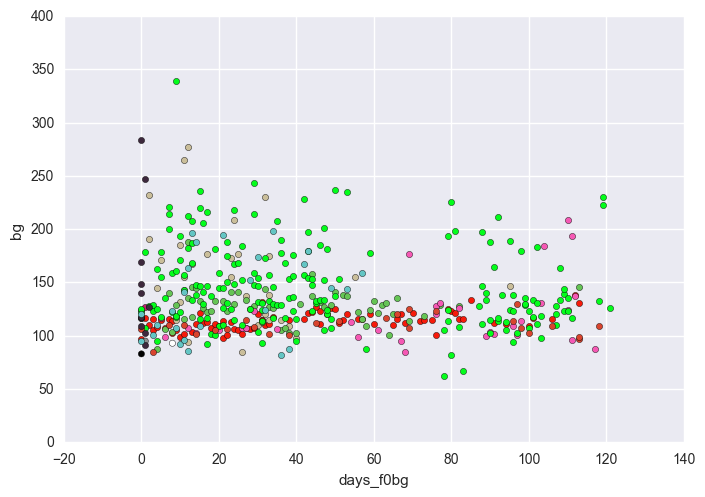

In [103]:
plt.show()

In [ ]:
run 